# $\gamma p \rightarrow K^0 \Sigma^+$  MCMC Information

In [1]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

## Bins
4 x E $_{\gamma}$ bins, variable cos $\theta _{K0}$ bins

21 in total, approx 1,000 integrated signal per bin

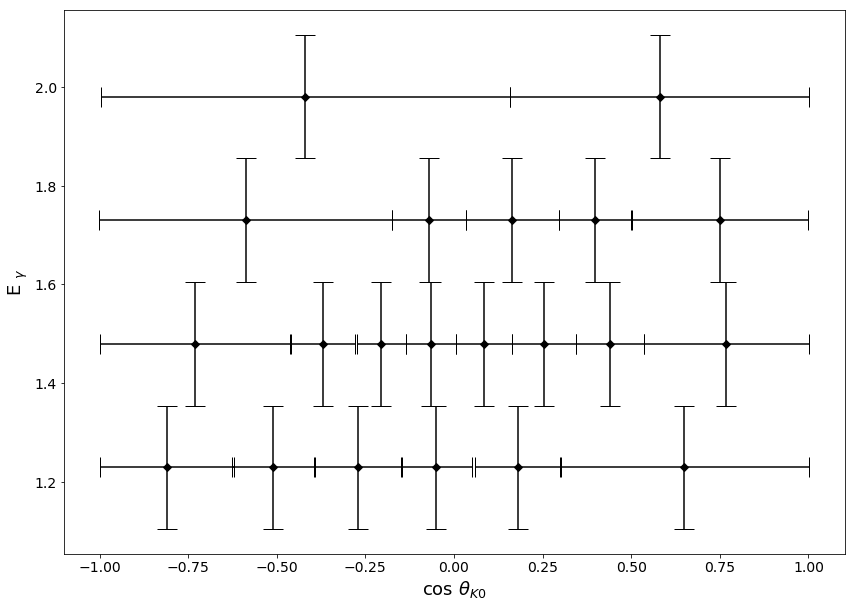

In [2]:
# bins
fig, axes = plt.subplots(1, 1, figsize=(14,10))

# Egamma 1.23
x=[-0.81,-0.51,-0.27,-0.05,0.18,0.65] 
y=[1.23,1.23,1.23,1.23,1.23,1.23]
x_err=[0.189,0.116,0.122,0.1,0.122,0.351]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.48
x=[-0.73,-0.37,-0.205,-0.065,0.085,0.255,0.44,0.768] 
y=[1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48]
x_err=[0.268,0.09,0.07,0.07,0.08,0.09,0.095,0.233]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

# Egamma 1.73
x=[-0.588,-0.07,0.165,0.398,0.75] 
y=[1.73,1.73,1.73,1.73,1.73]
x_err=[0.413,0.105,0.13,0.103,0.25]
y_err=[0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.98
x=[-0.42,0.58] 
y=[1.98,1.98]
x_err=[0.577,0.4225]
y_err=[0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

axes.set_xlabel(r'cos $\theta _{K0}$', fontsize=18)
axes.set_ylabel(r'E $_{\gamma}$', fontsize=18)
plt.tick_params(labelsize=14)


## Read in csv data and extract bin centres from file name


In [3]:
# Definition of columns in csv
csv_labels = ['Obs','Val','FileName']
# Read file into a DataFrame...
#csv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3/out1/CsvAllBins.csv', names=csv_labels)
csv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3_test19/out1/CsvAllBins.csv', names=csv_labels)
mergedcsv_df = pd.read_csv('/home/louise/g8K0Sig/code/AllObsAmp3_test19/out1/MergedCsvAllBins.csv', names=csv_labels)


topDir = '/home/louise/public_html/html/images/st19/'

# Print first few rows as a check...
csv_df.head()

Obs       Val                    FileName
0   B  0.606348  costhK0CMS0.43_Egamma1.48_
1  Ox  0.727195  costhK0CMS0.43_Egamma1.48_
2  Oz -0.111026  costhK0CMS0.43_Egamma1.48_
3   R  0.639066  costhK0CMS0.43_Egamma1.48_
4   T  0.920922  costhK0CMS0.43_Egamma1.48_

In [4]:
# get the bin centres from the file name
file_str = 'costhK0CMS0.58_Egamma1.98_'
file_str.find('_Egamma')
file_str[10:file_str.find('_Egamma')] 
bins = file_str[10:file_str.find('_Egamma')], file_str[file_str.find('_Egamma')+7:len(file_str)-1]
print(bins)

('0.58', '1.98')


In [5]:
# Create new column in df with costh bin centre
def get_costh(file_str):
    return float(file_str[10:file_str.find('_Egamma')])

csv_df['costh'] = csv_df['FileName'].apply(get_costh)
mergedcsv_df['costh'] = mergedcsv_df['FileName'].apply(get_costh)
csv_df.head()

Obs       Val                    FileName  costh
0   B  0.606348  costhK0CMS0.43_Egamma1.48_   0.43
1  Ox  0.727195  costhK0CMS0.43_Egamma1.48_   0.43
2  Oz -0.111026  costhK0CMS0.43_Egamma1.48_   0.43
3   R  0.639066  costhK0CMS0.43_Egamma1.48_   0.43
4   T  0.920922  costhK0CMS0.43_Egamma1.48_   0.43

In [6]:
# Create new column in df with Egamma bin centre
def get_Egamma(file_str):
    return float(file_str[file_str.find('_Egamma')+7:len(file_str)-1])

csv_df['Egamma'] = csv_df['FileName'].apply(get_Egamma)
mergedcsv_df['Egamma'] = mergedcsv_df['FileName'].apply(get_Egamma)
csv_df.head()

Obs       Val                    FileName  costh  Egamma
0   B  0.606348  costhK0CMS0.43_Egamma1.48_   0.43    1.48
1  Ox  0.727195  costhK0CMS0.43_Egamma1.48_   0.43    1.48
2  Oz -0.111026  costhK0CMS0.43_Egamma1.48_   0.43    1.48
3   R  0.639066  costhK0CMS0.43_Egamma1.48_   0.43    1.48
4   T  0.920922  costhK0CMS0.43_Egamma1.48_   0.43    1.48

## cos $\theta _{K0}$ dependence for each E $_{\gamma}$ bin

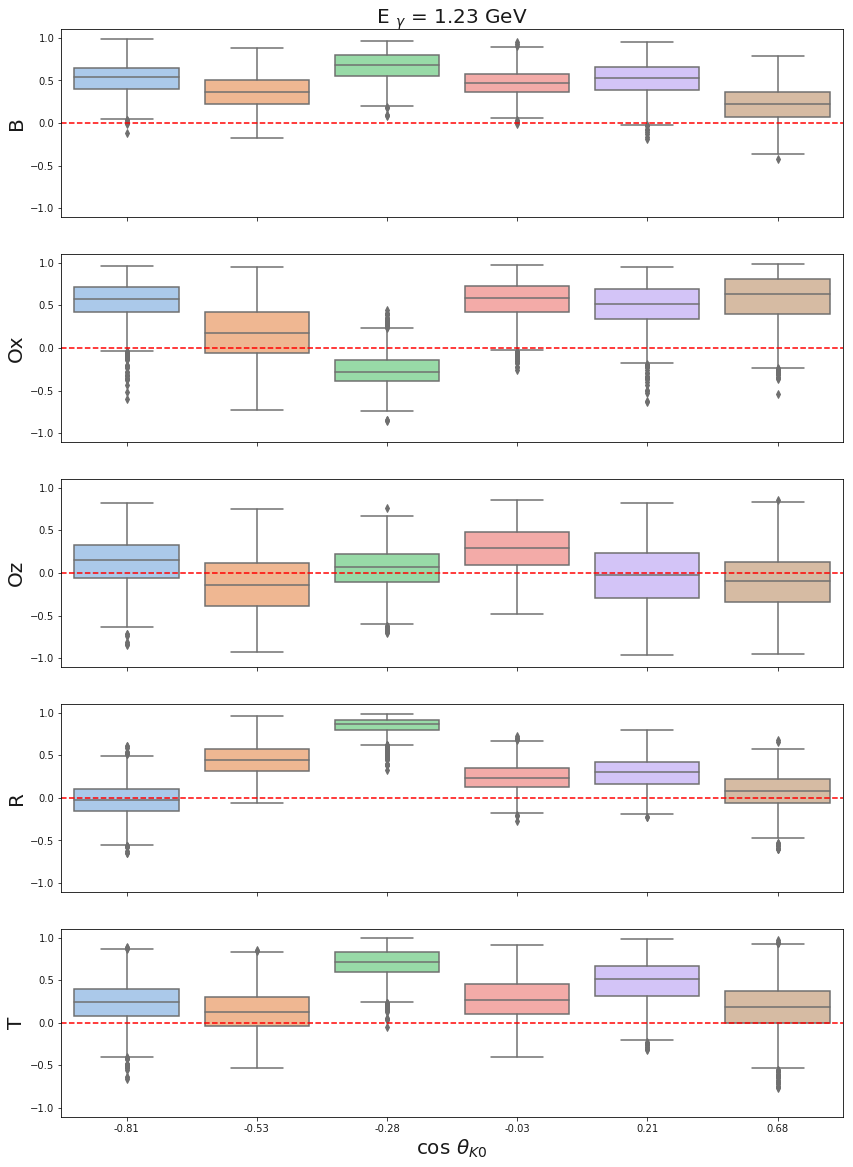

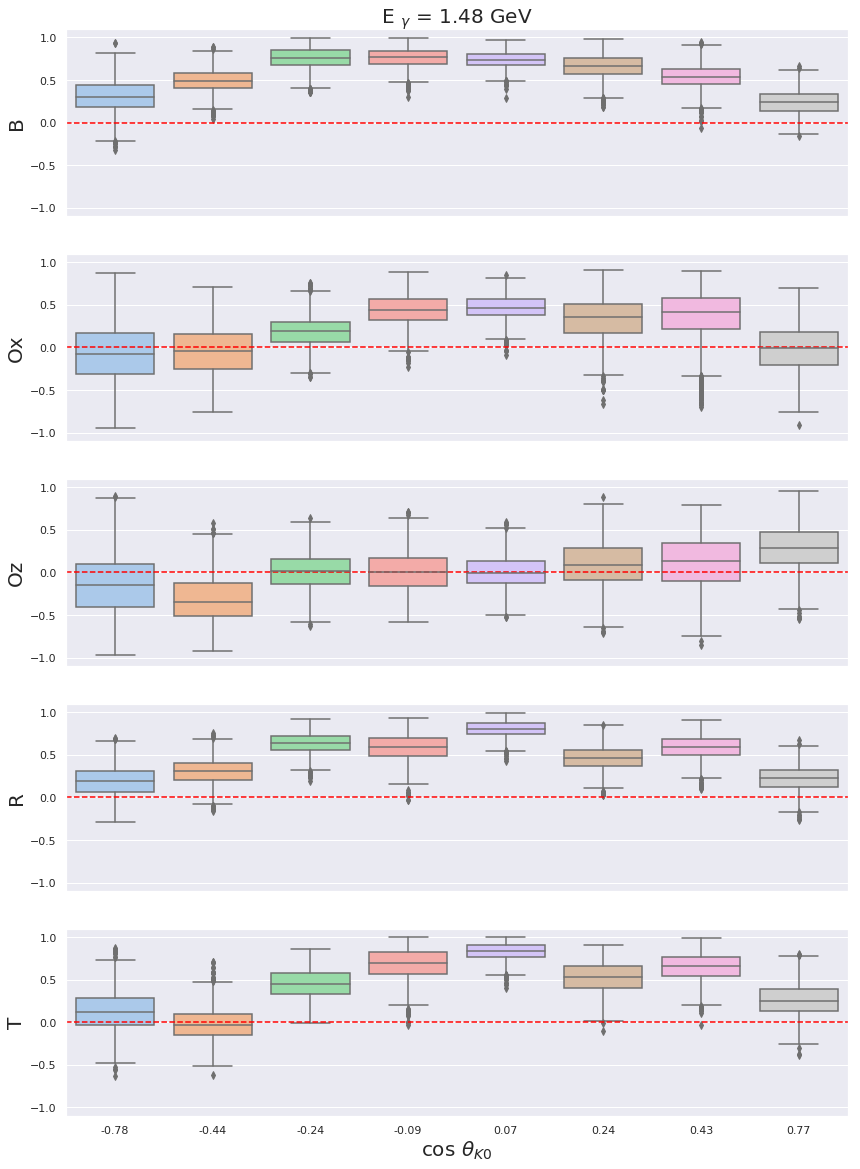

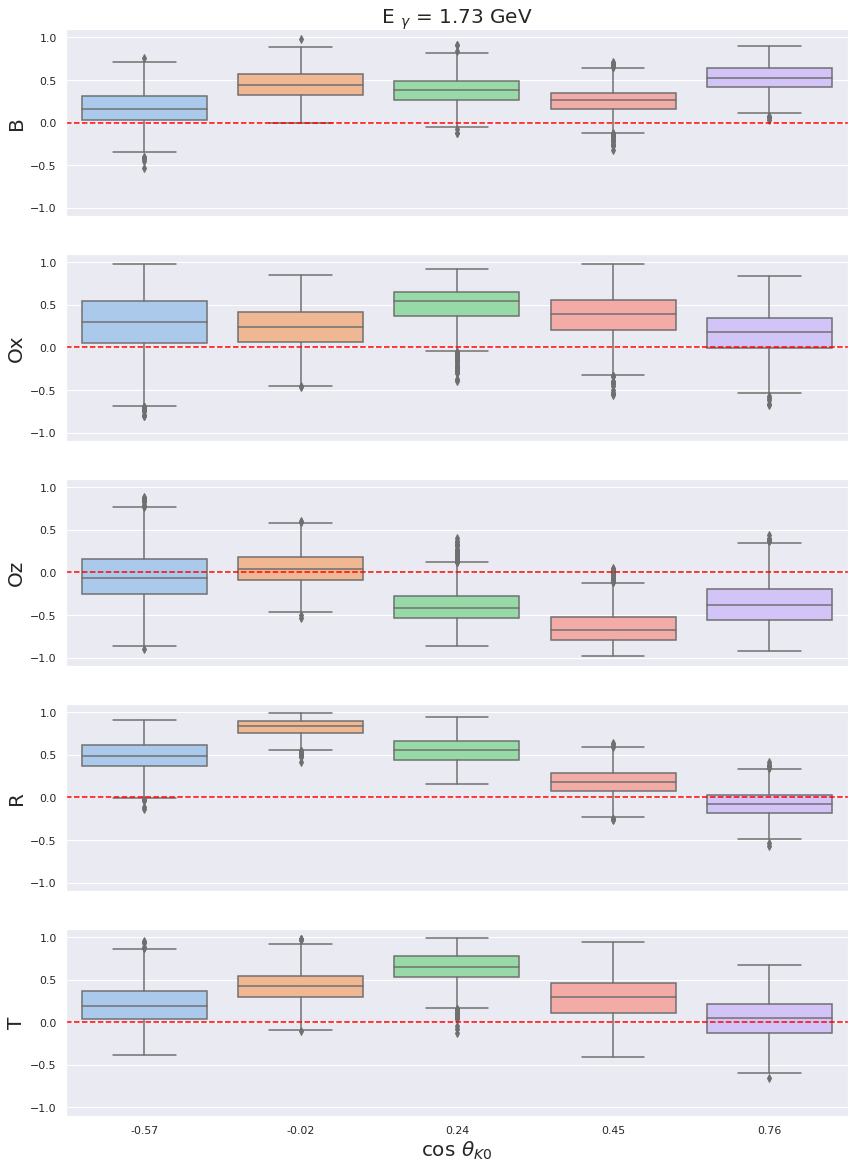

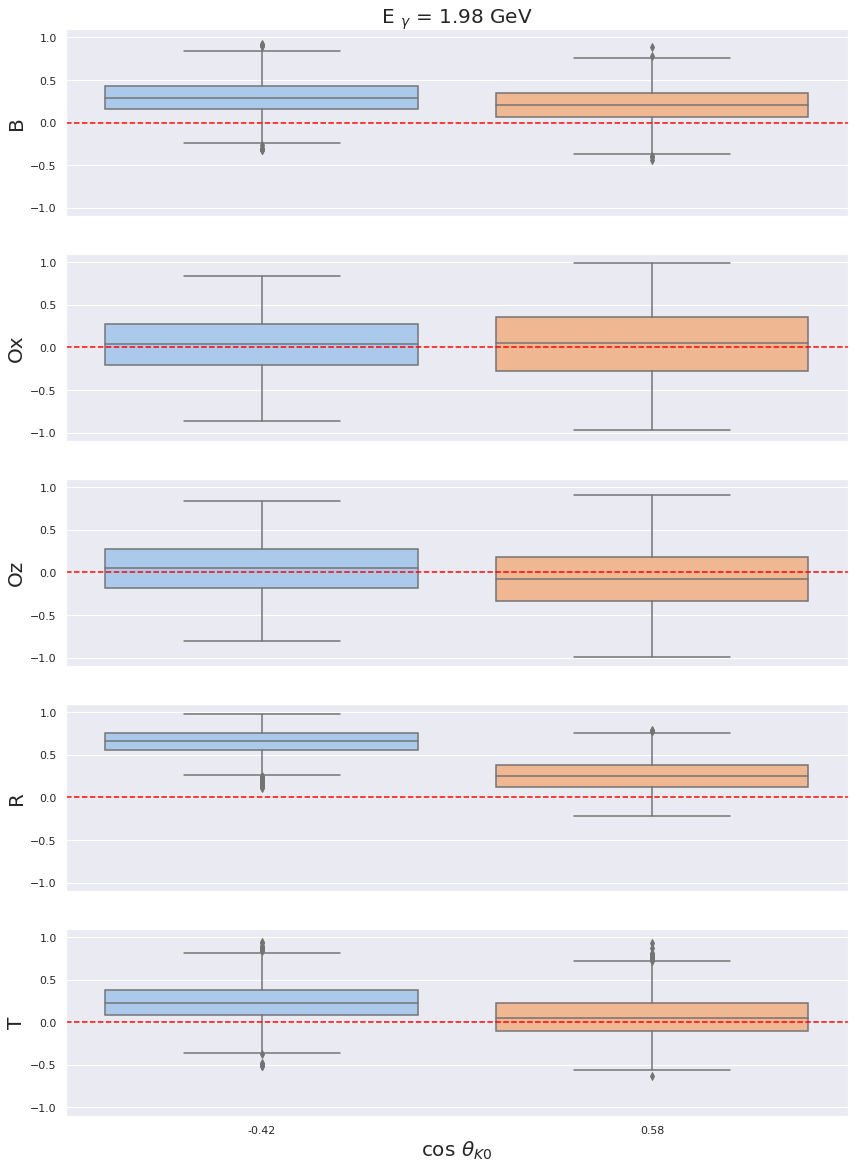

In [7]:
# Plot each bin and observable
# costh dependance

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    plt.show()
    

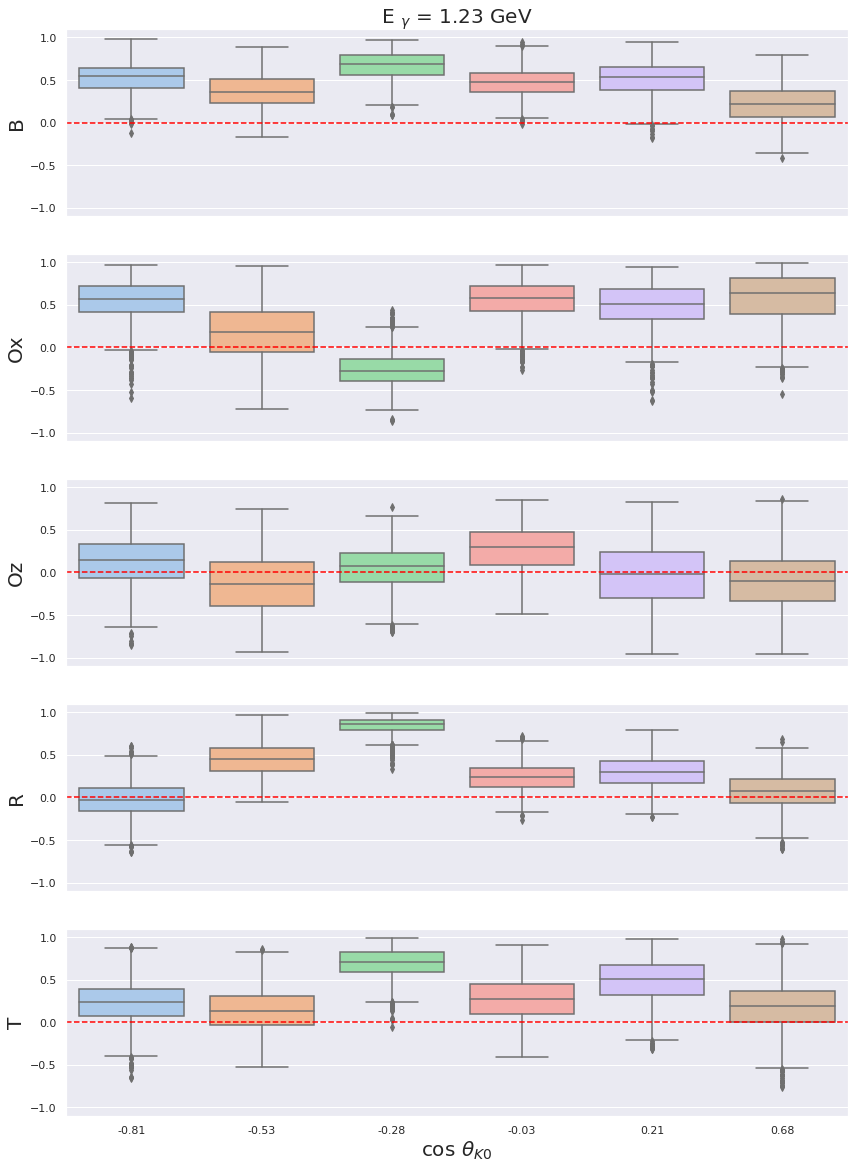

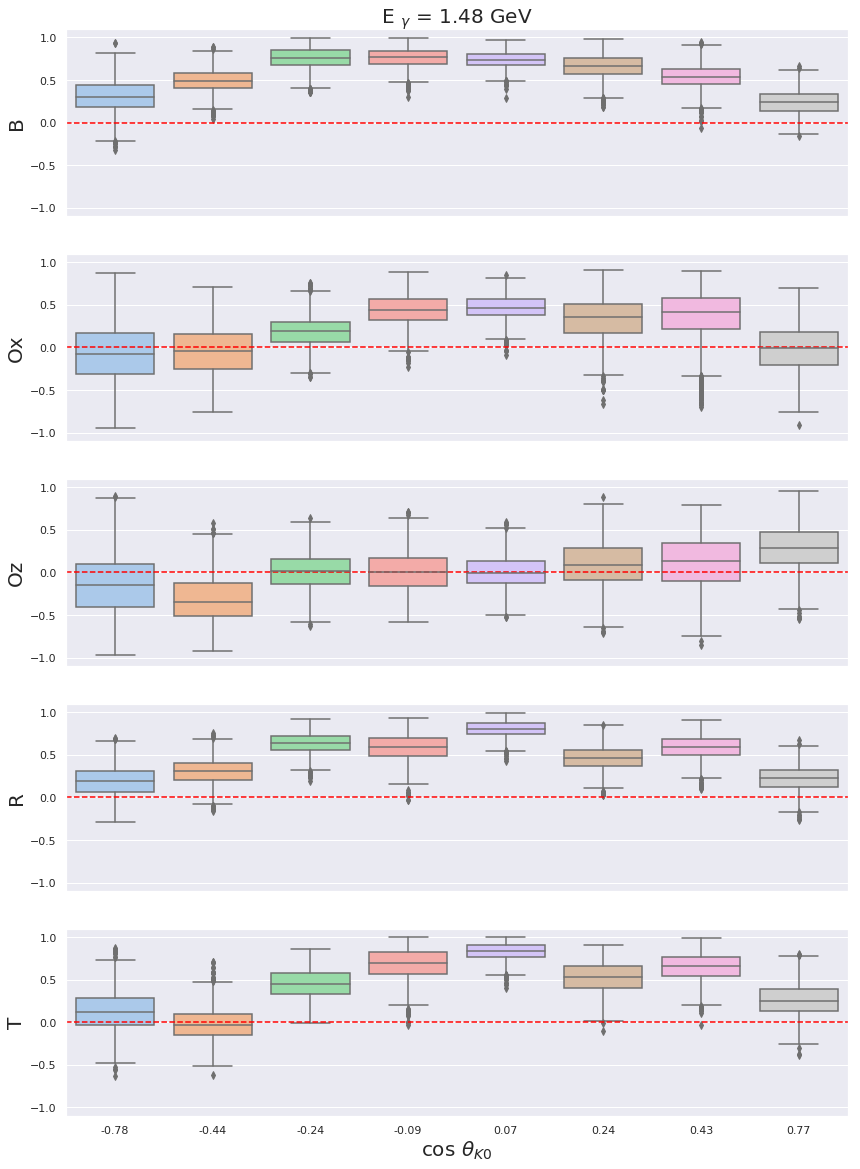

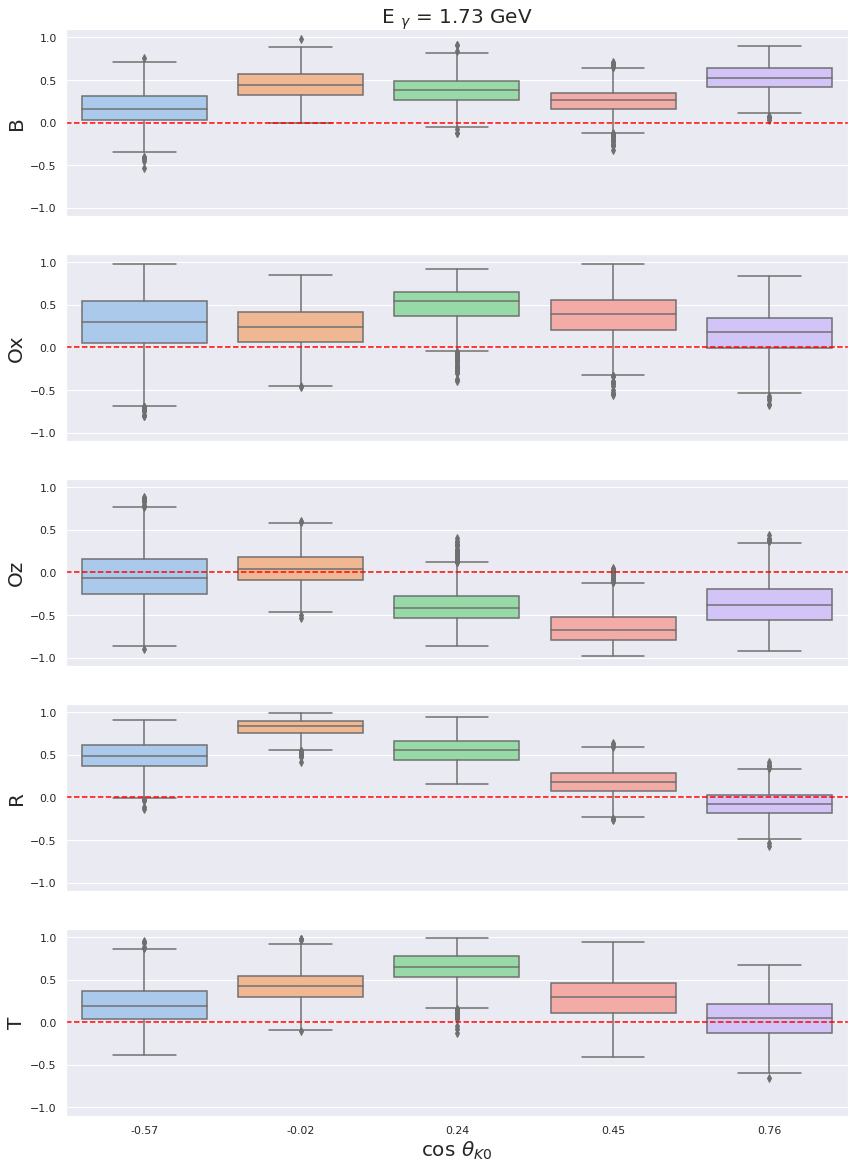

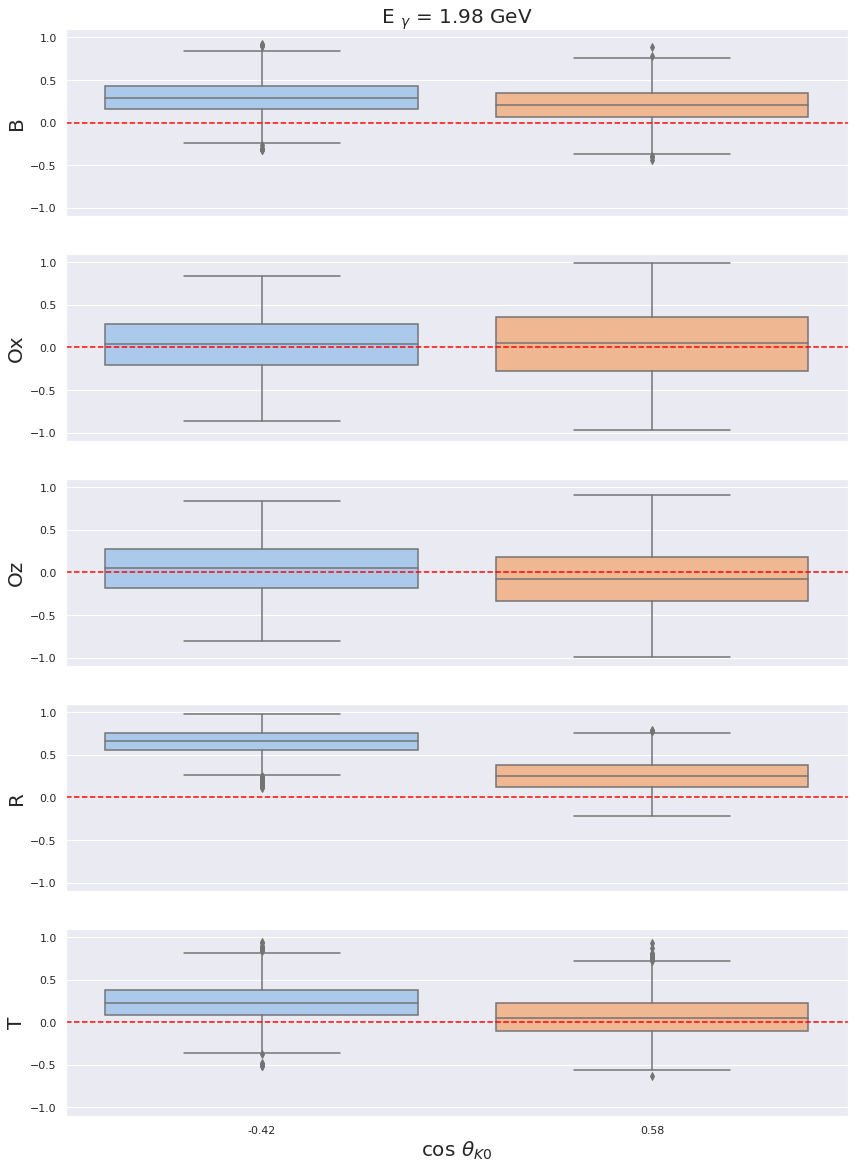

In [8]:
# Plot each bin and observable
# costh dependance

imageDir = topDir+'MCMCBox/'

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    #plt.show()
    plt.savefig(imageDir+"box"+str(bin_idx)+".png")
    

## cos $\theta _{K0}$ dependence for all E $_{\gamma}$ bins

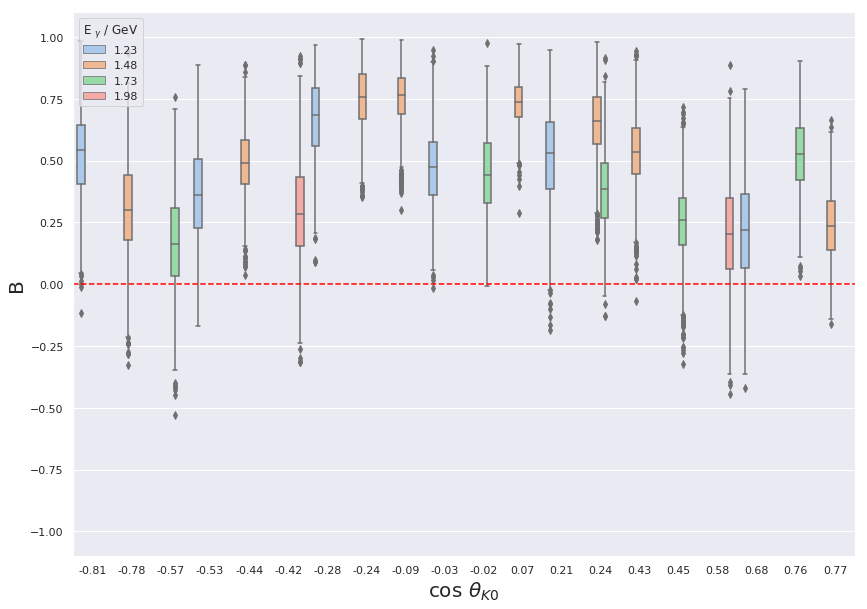

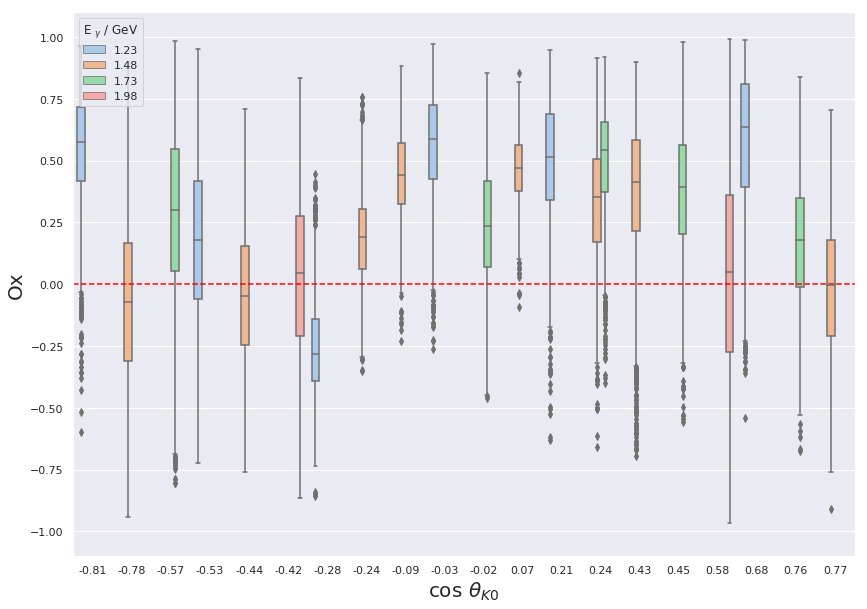

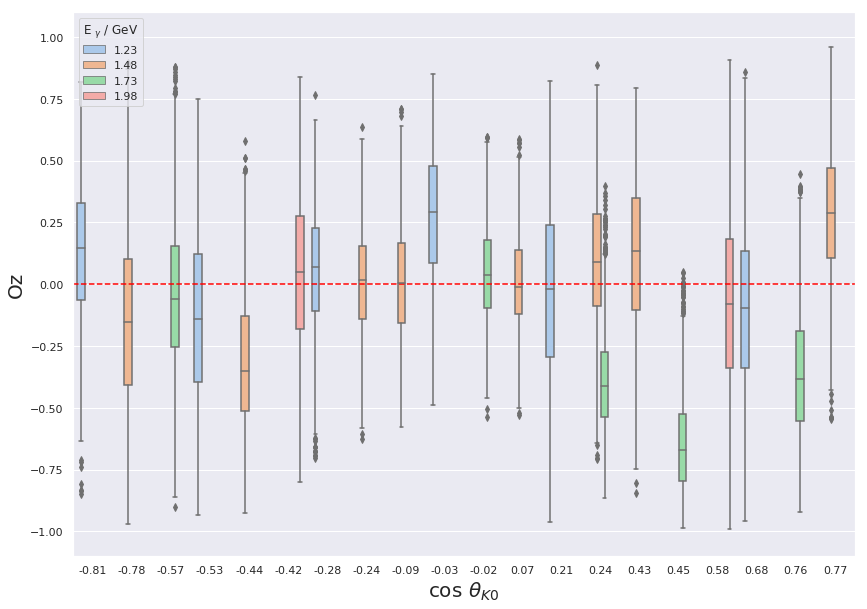

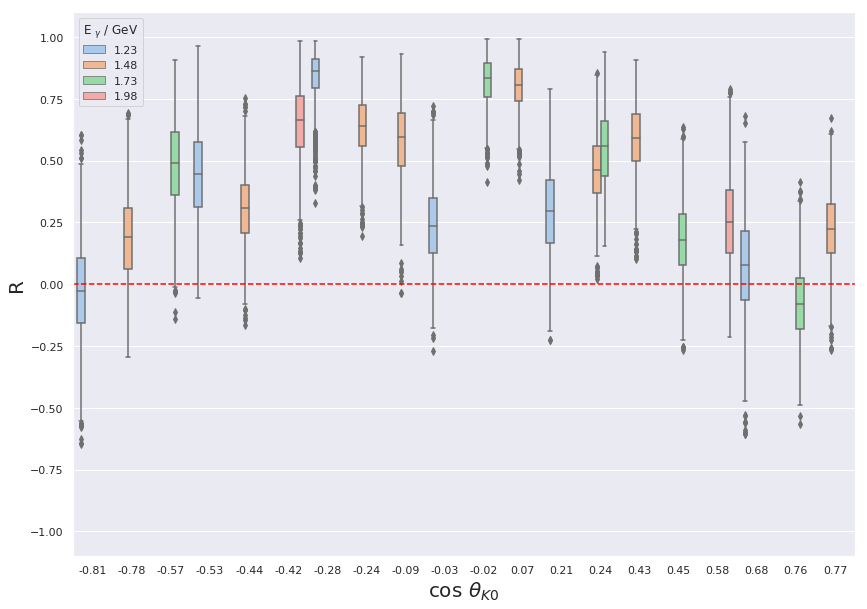

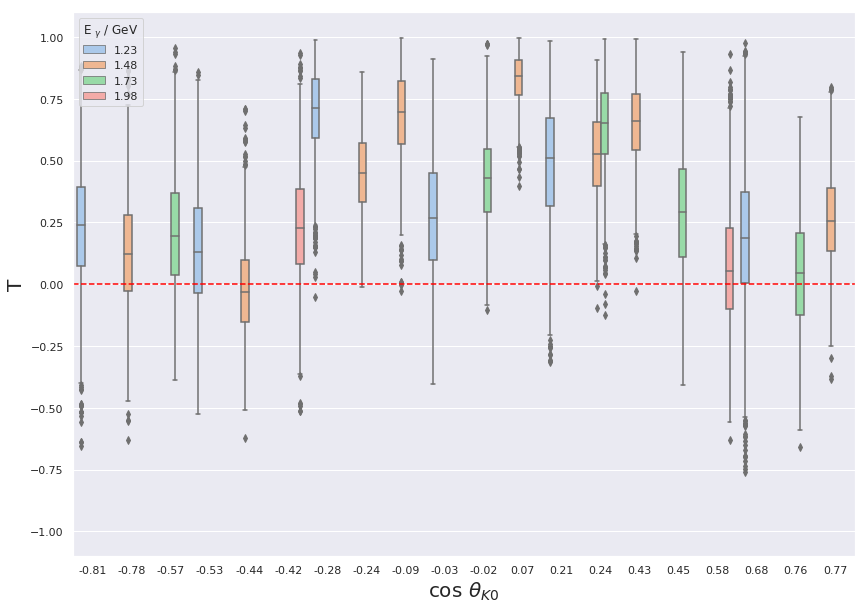

In [9]:
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="costh", y="Val", hue='Egamma') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'E $_{\gamma}$ / GeV')
    ax.set_xlabel(r'cos $\theta _{K0}$', fontsize=20)     
    plt.show()
    


## E $_{\gamma}$ dependence for all cos $\theta _{K0}$ bins

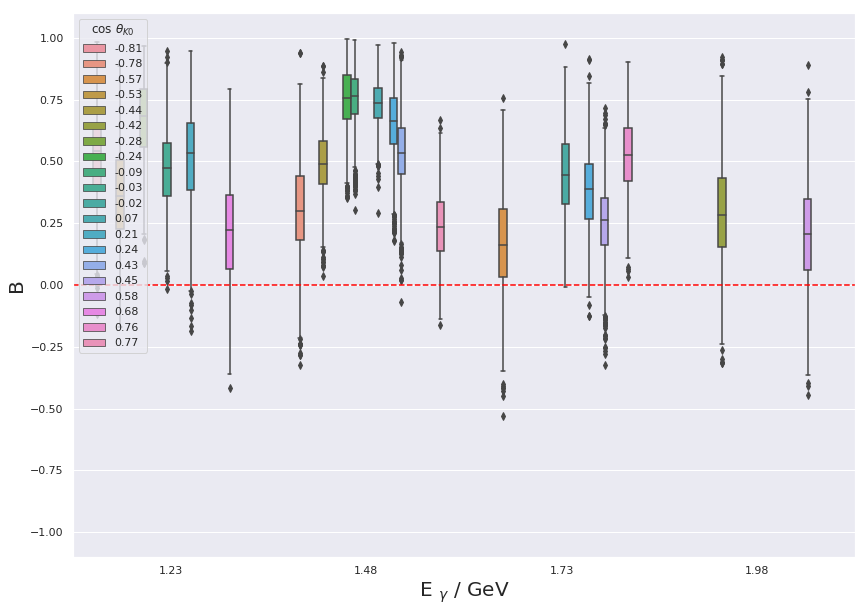

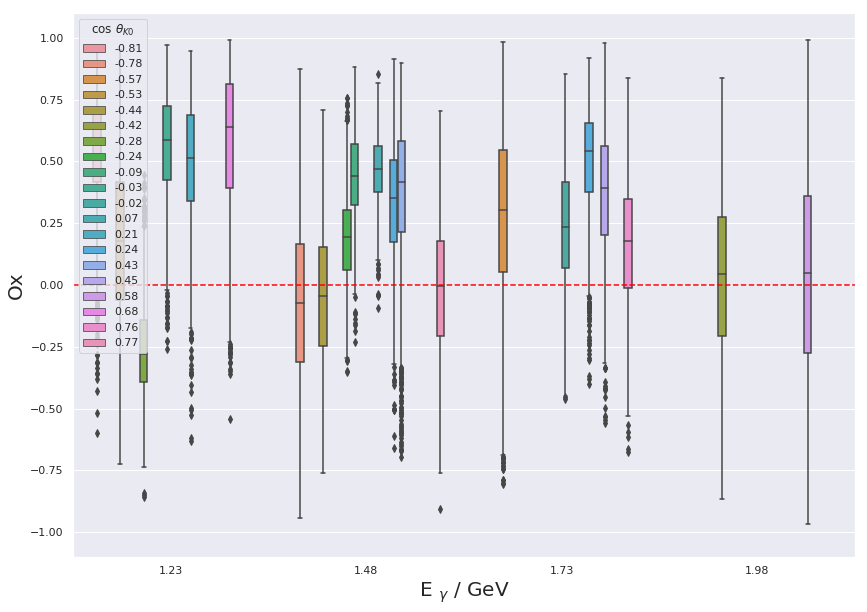

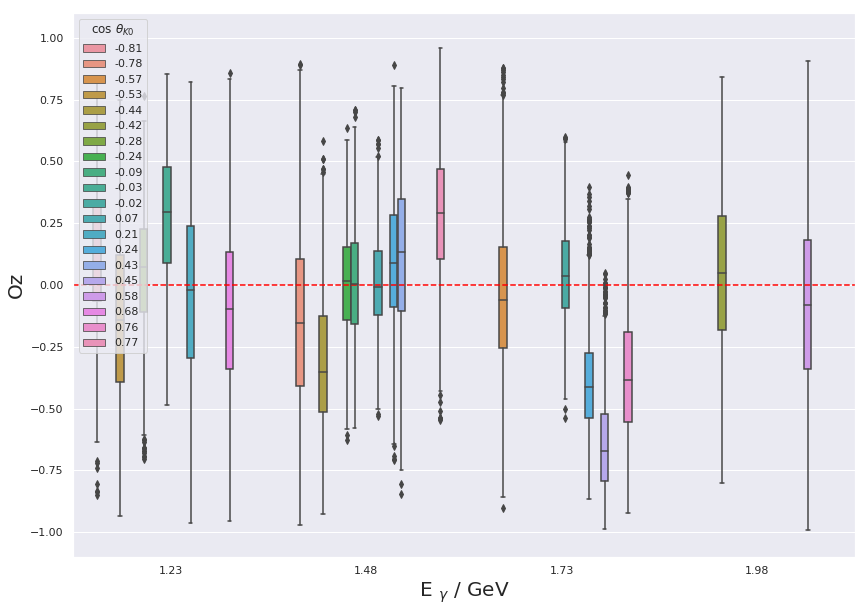

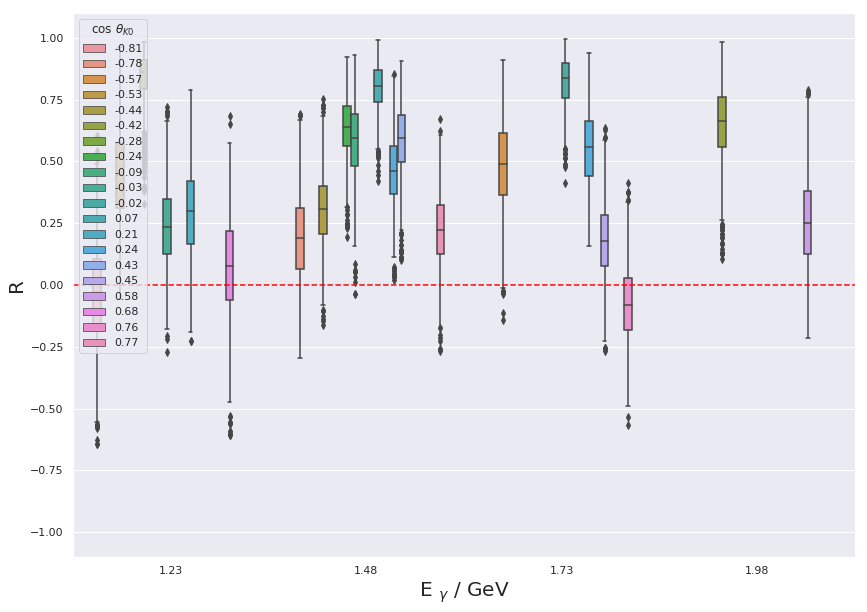

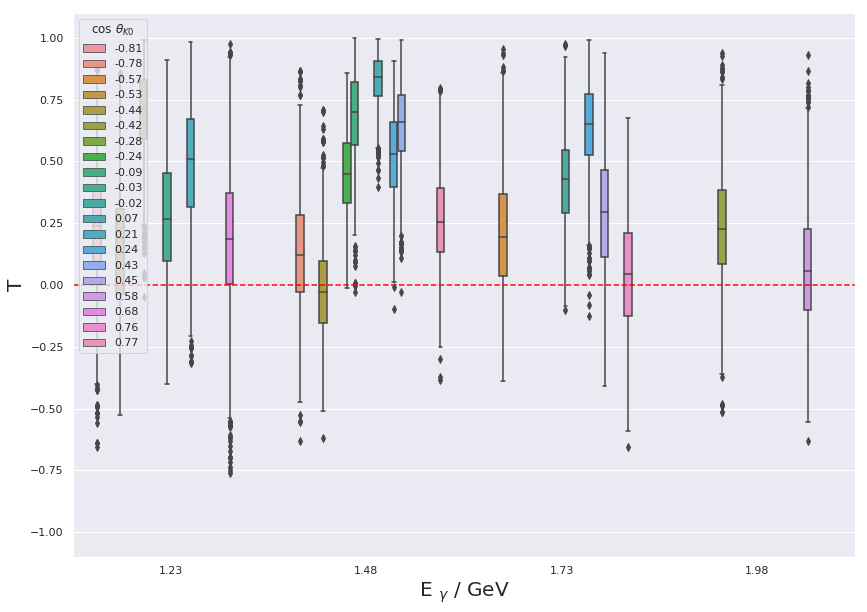

In [10]:
# Plot each bin and observable
# Egamma dependance
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="Egamma", y="Val", hue='costh') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'cos $\theta _{K0}$')
    ax.set_xlabel(r'E $_{\gamma}$ / GeV', fontsize=20)     
    plt.show()
    

## Corner plots for all bins

In [11]:
# combine the rows into 1 row with 5 values

# get the bin
dfEg = csv_df[csv_df['Egamma']==1.23]
dfCosth = dfEg[dfEg['costh']==-0.81]

# get df for each obs
dfB = dfCosth[dfCosth['Obs']=='B']
dfB = dfB.reset_index()
dfOx = dfCosth[dfCosth['Obs']=='Ox']
dfOx = dfOx.reset_index()
dfOz = dfCosth[dfCosth['Obs']=='Oz']
dfOz = dfOz.reset_index()
dfR = dfCosth[dfCosth['Obs']=='R']
dfR = dfR.reset_index()
dfT = dfCosth[dfCosth['Obs']=='T']
dfT = dfT.reset_index()

# merge them
pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
          axis=1, keys=['B','Ox','Oz','R','T'])


B        Ox        Oz         R         T
0     0.427705  0.760951 -0.091730  0.242715  0.255864
1     0.427705  0.760951 -0.091730  0.242715  0.255864
2     0.287799  0.862582 -0.233541  0.120937  0.328784
3     0.236135  0.885544 -0.202671  0.202251  0.425176
4     0.345550  0.829394 -0.258969  0.030043  0.221036
5     0.410140  0.570066 -0.380444 -0.071615  0.100529
6     0.239726  0.548475 -0.265504  0.196600  0.418477
7     0.239726  0.548475 -0.265504  0.196600  0.418477
8     0.322188  0.259670  0.040083  0.066812  0.264624
9     0.324611  0.256585  0.042542  0.062999  0.260103
10    0.277821  0.573555 -0.315644  0.136642  0.347402
11    0.373620  0.583174 -0.201414  0.251170  0.433972
12    0.404007  0.313255  0.100007  0.190473  0.364407
13    0.592467  0.093998  0.213471 -0.185968 -0.067034
14    0.592467  0.093998  0.213471 -0.185968 -0.067034
15    0.696546  0.348857  0.389989 -0.393862 -0.305302
16    0.714698  0.336658  0.370604 -0.387377 -0.319269
17    0.587028  0.394057  0.464949 -0.432990 -0.221040
18    0.629424  0.146957  0.226131 -0.471272 -0.200231
19    0.580035  0.473001  0.388038 -0.400806 -0.093643
20    0.651724  0.534232  0.219311 -0.161687  0.093043
21    0.610825  0.724022 -0.050426 -0.063243  0.221401
22    0.706729  0.589963  0.168039 -0.007471  0.175045
23    0.844609  0.480286  0.055751  0.072712  0.108400
24    0.422575 -0.032758  0.546969 -0.172718  0.312392
25    0.840742  0.497256  0.033161  0.070463  0.110269
26    0.869732  0.274108  0.278587  0.055823  0.127756
27    0.876913  0.266192  0.288136  0.107867  0.175835
28    0.843945  0.202714  0.404242 -0.131085 -0.044913
29    0.830319  0.206563  0.419555 -0.055218  0.038477
...        ...       ...       ...       ...       ...
1920  0.638445  0.744202  0.112272 -0.112862  0.014556
1921  0.703575  0.453921  0.444675  0.087608  0.192073
1922  0.638832  0.644601  0.335174 -0.111670  0.015612
1923  0.622769  0.659149  0.330821 -0.072160  0.060783
1924  0.614845  0.694054  0.290230 -0.094680  0.041055
1925  0.643383  0.754468  0.016281 -0.013572  0.112106
1926  0.633237  0.760887  0.050702 -0.042407  0.086847
1927  0.610364  0.741481  0.204785 -0.107419  0.029896
1928  0.638315  0.605746  0.376412 -0.027974  0.099490
1929  0.613545  0.411542  0.080752  0.038596  0.174789
1930  0.575590  0.404762  0.123290  0.140599  0.290168
1931  0.563782  0.583629 -0.251605  0.116686  0.270418
1932  0.674179  0.687433  0.155084 -0.165922 -0.051096
1933  0.678341  0.685436  0.156109 -0.151027 -0.037669
1934  0.588226  0.703856  0.299113 -0.196611  0.018047
1935  0.588226  0.703856  0.299113 -0.196611  0.018047
1936  0.551483  0.700062  0.374634 -0.124925  0.108887
1937  0.575047  0.695768  0.324319 -0.142011  0.125728
1938  0.575047  0.695768  0.324319 -0.142011  0.125728
1939  0.575047  0.695768  0.324319 -0.142011  0.125728
1940  0.608981  0.717399  0.213199 -0.050818  0.195541
1941  0.670291  0.662497  0.272377 -0.014649  0.164888
1942  0.542207  0.695068  0.110993 -0.408816 -0.159533
1943  0.529056  0.558499 -0.380133 -0.396803 -0.166700
1944  0.488751  0.639082 -0.395514 -0.359984 -0.188665
1945  0.488751  0.639082 -0.395514 -0.359984 -0.188665
1946  0.568337  0.341942 -0.328358 -0.432686 -0.145293
1947  0.566005  0.339612 -0.326618 -0.440426 -0.151481
1948  0.640586  0.400464 -0.128788 -0.192893  0.046398
1949  0.684666  0.450520  0.015192 -0.224944  0.074514

[1950 rows x 5 columns]

In [12]:
# corner plots for all bins
imageDir = topDir+'MCMCCorner/'

Eg_bins = [1.23,1.48,1.73,1.98]
# bins up to test 18
#costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
#              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
#              [-0.59,-0.07,0.17,0.40,0.75],
#              [-0.42, 0.58]
#             ]
# bins from test 19 onwards
costh_bins = [[-0.81,-0.53,-0.28,-0.03,0.21,0.68],
              [-0.78,-0.44,-0.24,-0.09,0.07,0.24,0.43,0.77],
              [-0.57,-0.02,0.24,0.45,0.76],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])
        
        # corner plot for one bin
        import corner 

        fig = corner.corner(dfObs,
                            color='royalblue', 
                            range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                            bins=50,
                            truths=dfObs.mean().values, truth_color='red',
                            label_kwargs={'fontsize':30, 'labelpad':20},
                            hist_kwargs = {'histtype':'stepfilled','alpha':0.8},
                            labels=['$\Sigma$','$O_x$','$O_z$','P','T'])
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        #plt.show()
        plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+"corner.png")
        plt.clf()

/home/clas12/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

<Figure size 849.6x849.6 with 0 Axes>

  Obs       Val                    FileName  costh  Egamma  binStart
0   B  0.606348  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.60
1  Ox  0.727195  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.72
2  Oz -0.111026  costhK0CMS0.43_Egamma1.48_   0.43    1.48     -0.12
3   R  0.639066  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.62
4   T  0.920922  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.92


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

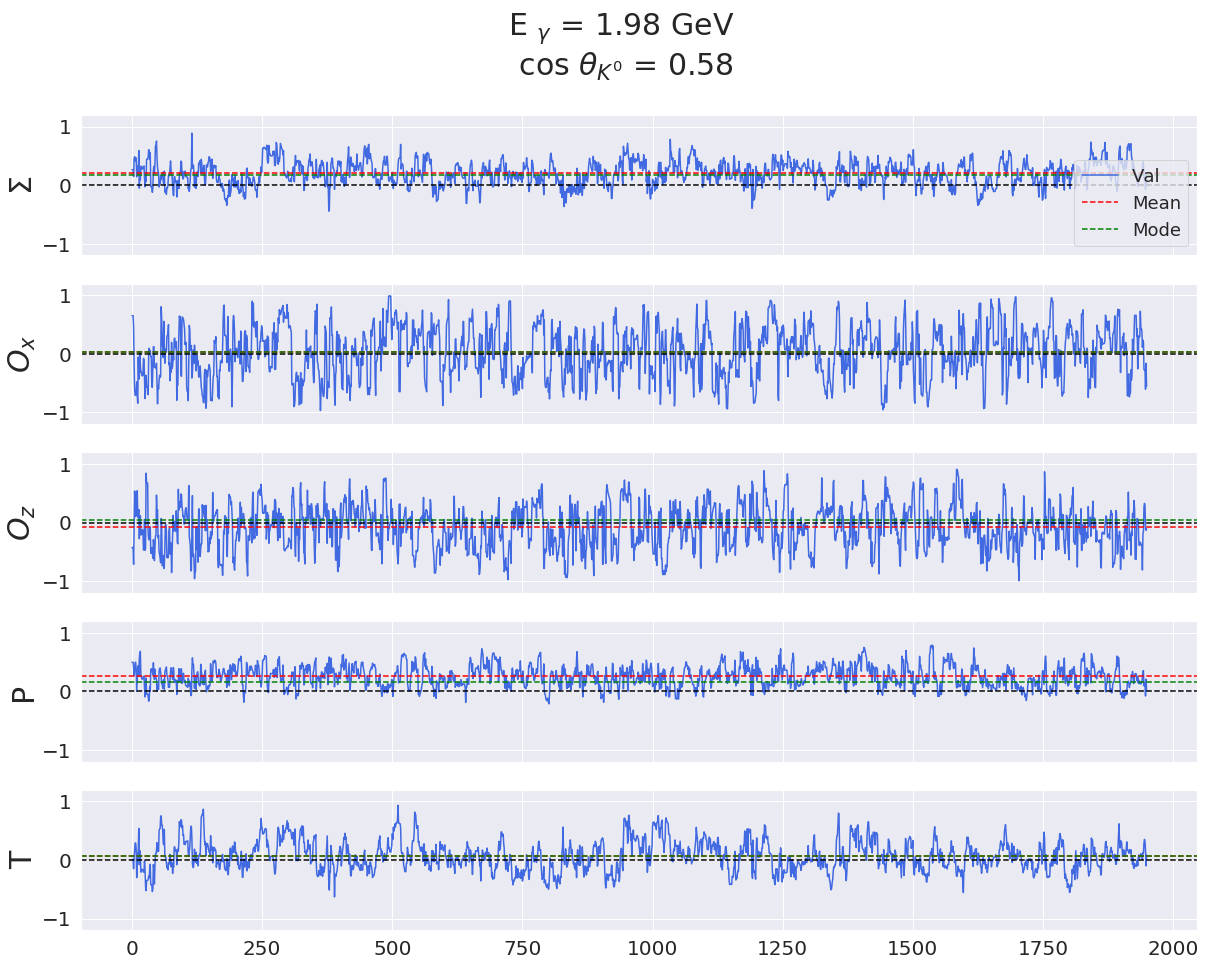

In [13]:
# time series plots for all bins
imageDir = topDir+'MCMCTime/'

# obs
n_obs = len(obs_labels)
axLabels=['$\Sigma$','$O_x$','$O_z$','P','T']

# add a column to the dataframe for bin start (0.02 bin width)
csv_df['binStart'] = ((csv_df['Val'] * 100) // 2) / 50
print(csv_df.head())

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        plt.clf()
        fig, axes = plt.subplots(n_obs, sharex=True, figsize=(20, 15))
        
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        
        # time series plot for one bin
        for i in range(n_obs):
            dfB = dfCosth[dfCosth['Obs']==obs_labels[i]]
            dfB = dfB.reset_index()

            #print(str(Eg_bins[ebin_idx]) + ' ' + str(costh_bins[ebin_idx][tbin_idx]))
            #print('Obs ' + obs_labels[i])
            #print('Mode binStart')
            #print(dfB['binStart'].mode()[0])
            #print('Mean')
            #print(dfB['Val'].mean())
            axes[i].plot(dfB['Val'], color="royalblue")
            axes[i].set_ylabel(axLabels[i], fontsize=30)
            axes[i].set_ylim(-1.2,1.2)
            axes[i].tick_params(axis='y', labelsize=20 )
            axes[i].axhline(0.0, color="black", linestyle='--')
            axes[i].axhline(dfB['Val'].mean(), color="red", linestyle='--',label='Mean')
            axes[i].axhline(dfB['binStart'].mode()[0], color="green", linestyle='--', label='Mode')
            if (i==0):
                axes[i].legend(fontsize=18, loc="lower right")

        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=30)
        #fig.legend(fontsize=14, loc="lower right")
        plt.xticks(fontsize=20)
        plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+"series.png")
        #plt.clf()

  Obs       Val                    FileName  costh  Egamma  binStart
0   B  0.606348  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.60
1  Ox  0.727195  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.72
2  Oz -0.111026  costhK0CMS0.43_Egamma1.48_   0.43    1.48     -0.12
3   R  0.639066  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.62
4   T  0.920922  costhK0CMS0.43_Egamma1.48_   0.43    1.48      0.92


<Figure size 432x288 with 0 Axes>

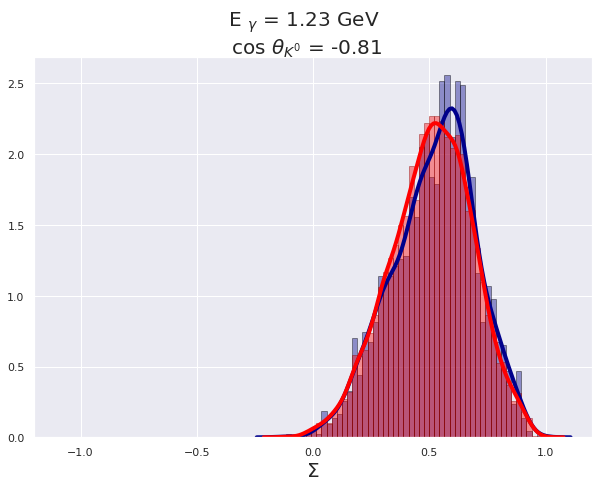

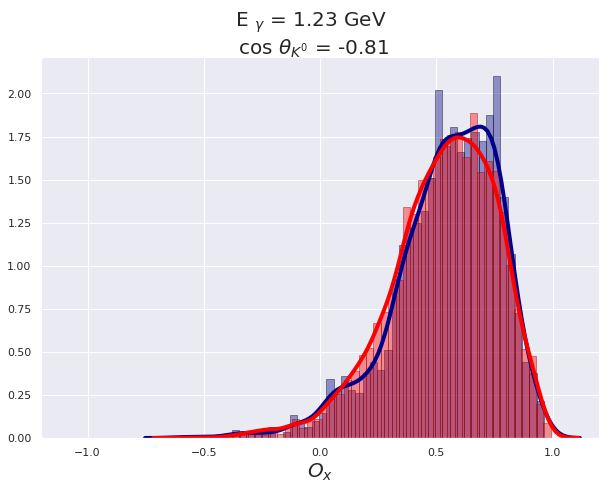

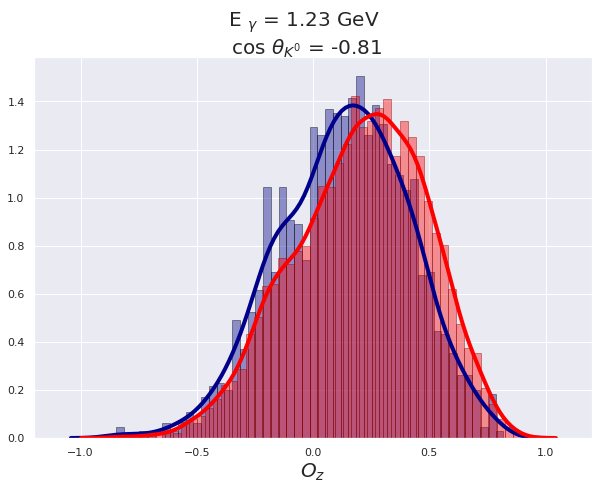

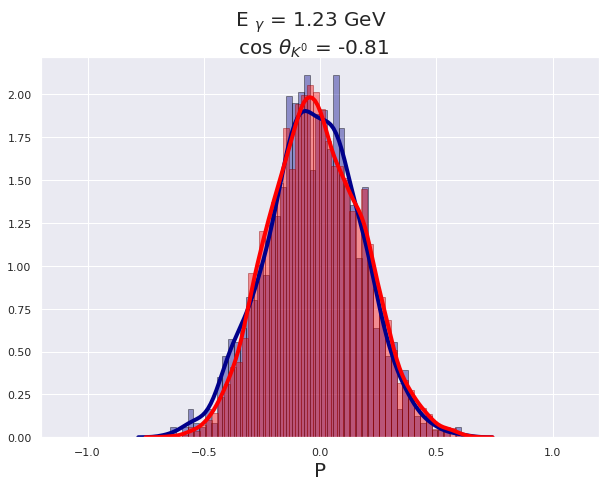

<Figure size 720x504 with 0 Axes>

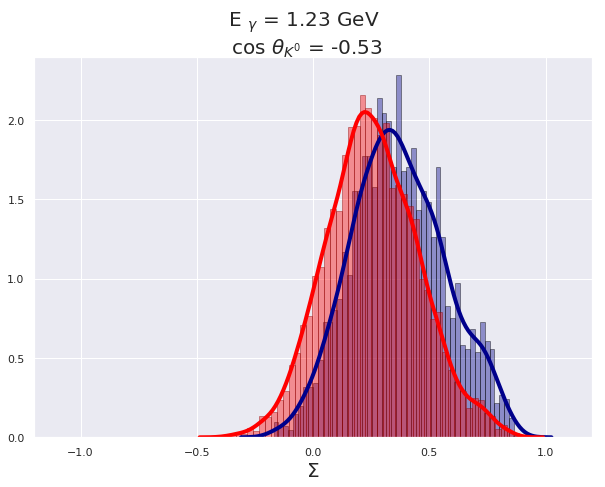

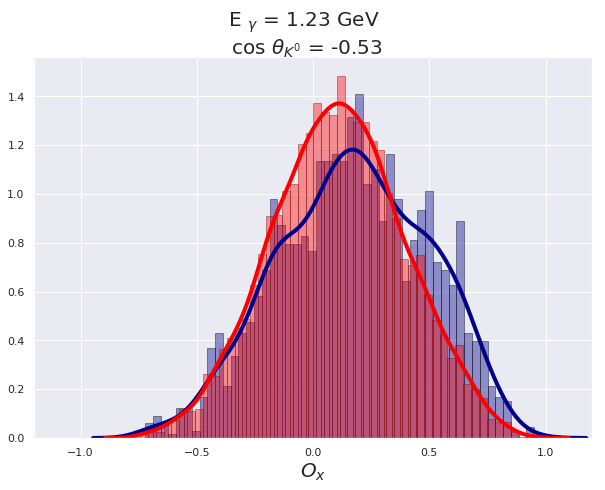

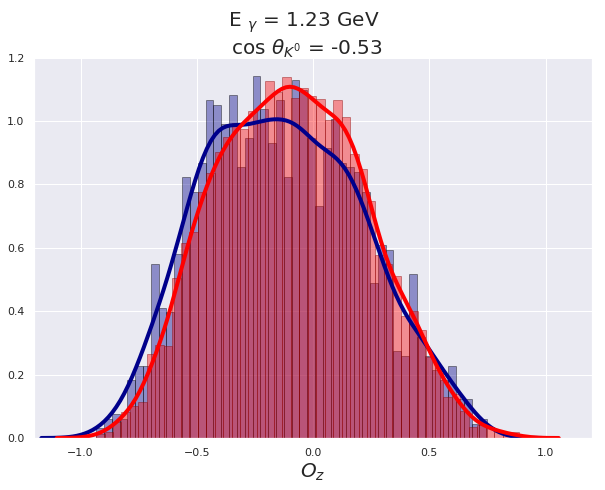

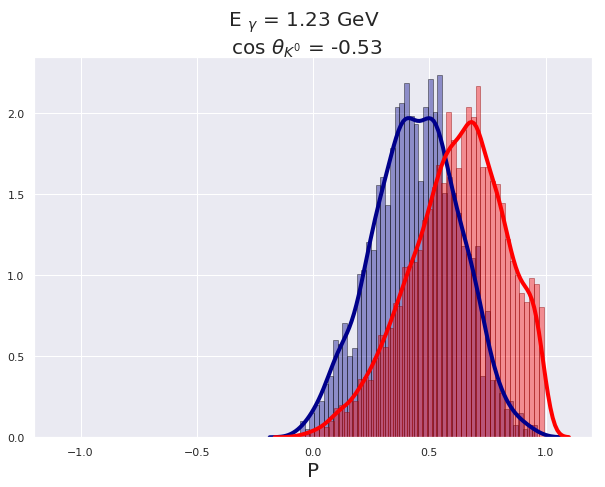

<Figure size 720x504 with 0 Axes>

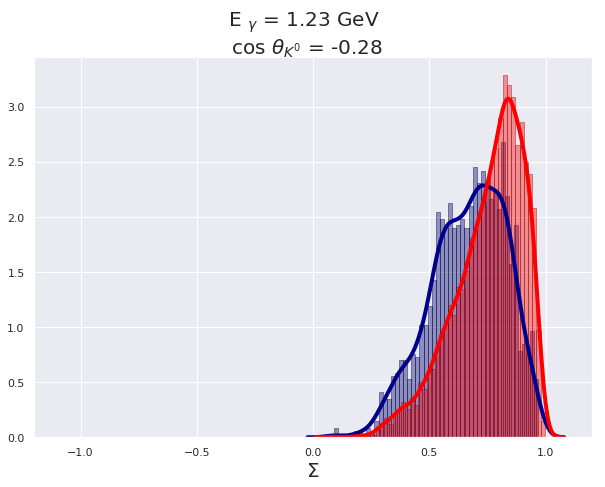

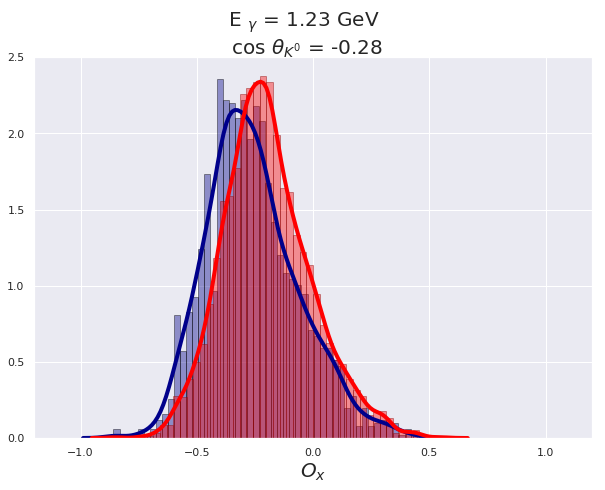

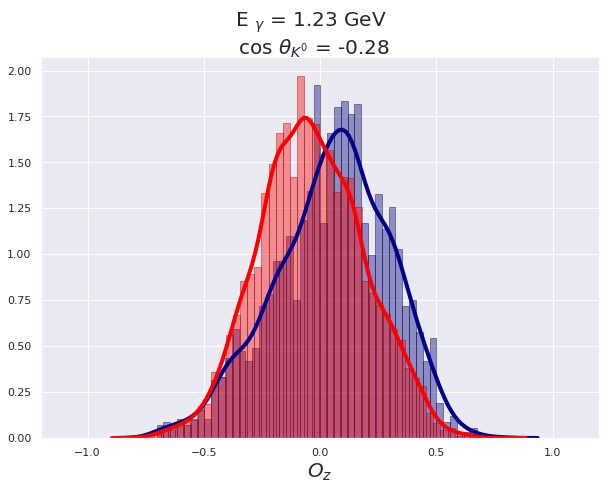

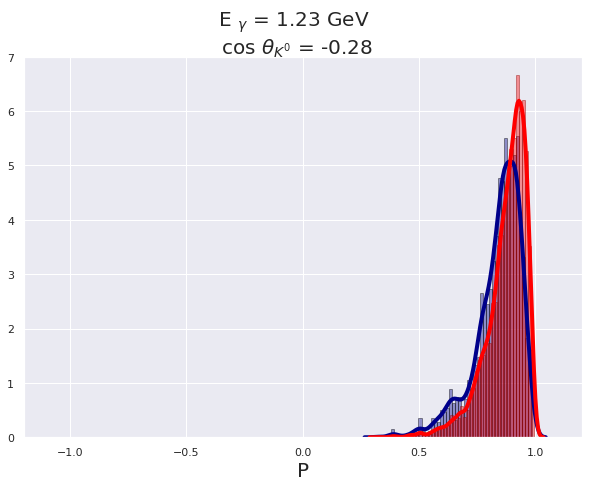

<Figure size 720x504 with 0 Axes>

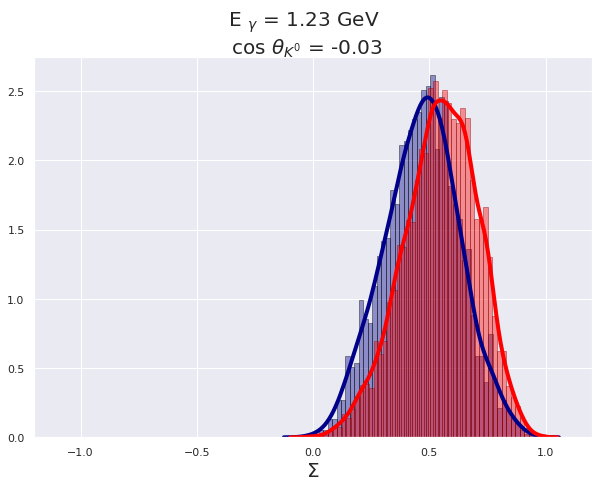

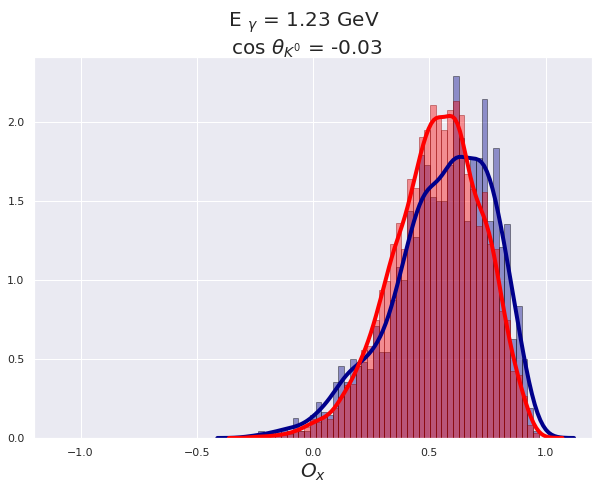

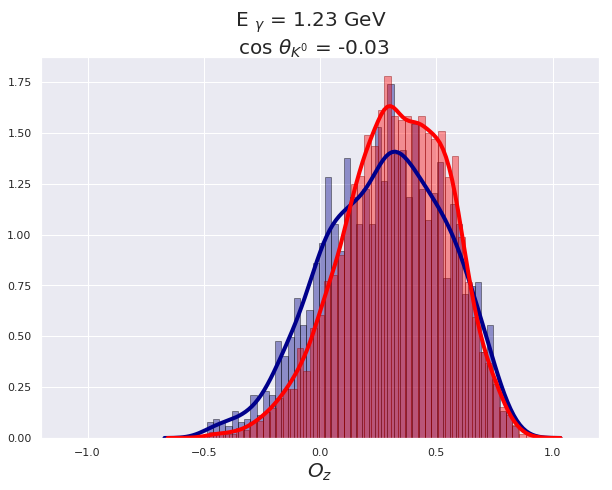

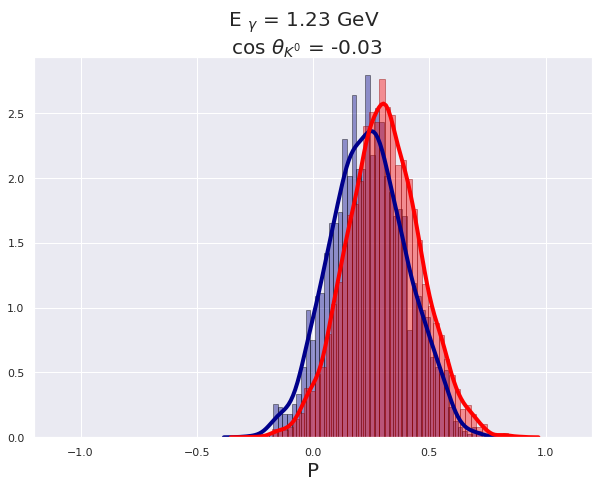

<Figure size 720x504 with 0 Axes>

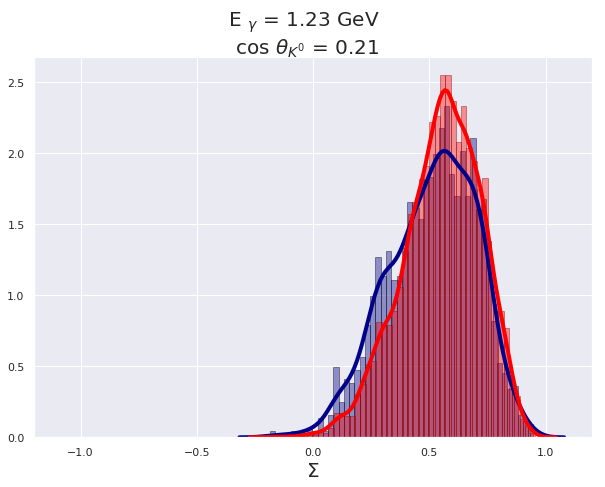

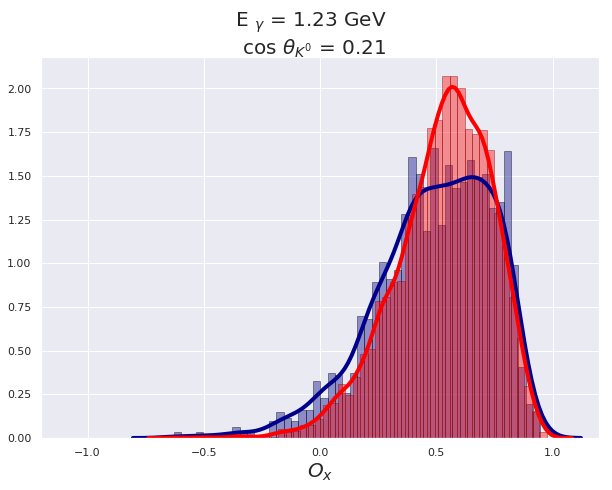

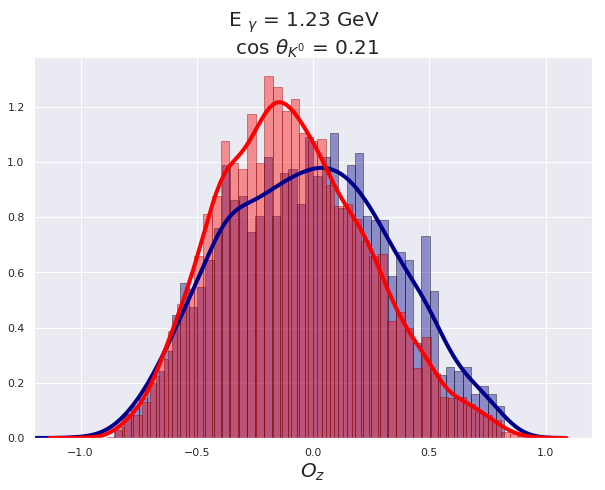

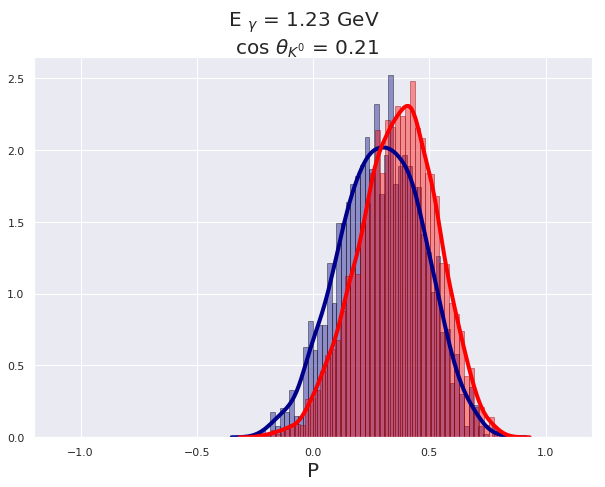

<Figure size 720x504 with 0 Axes>

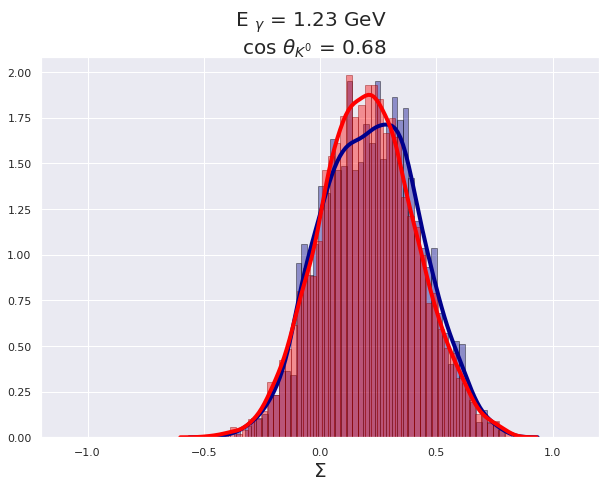

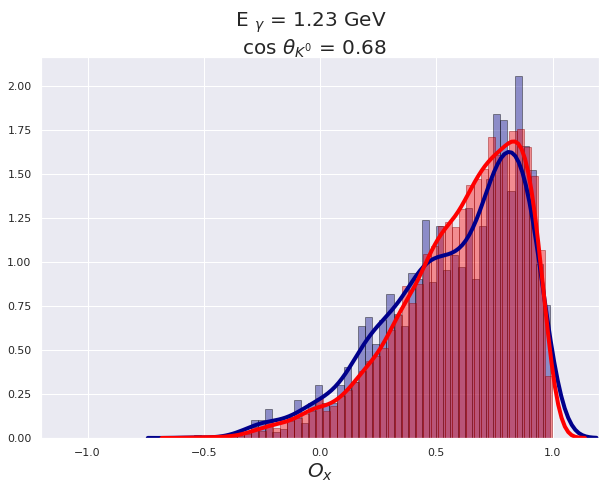

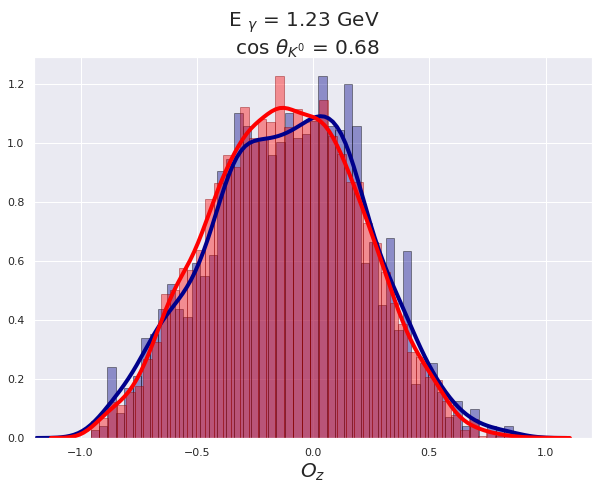

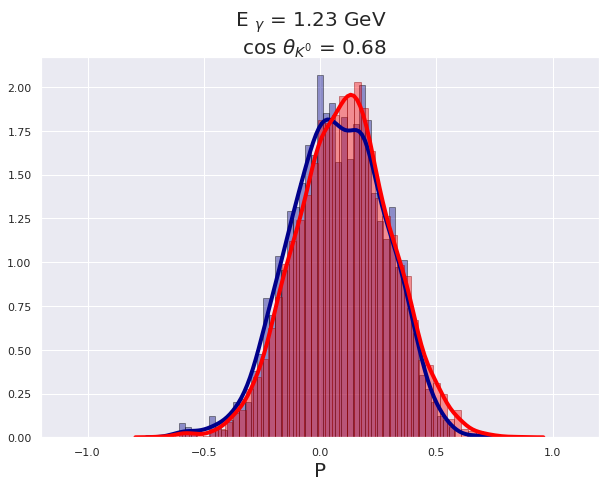

<Figure size 720x504 with 0 Axes>

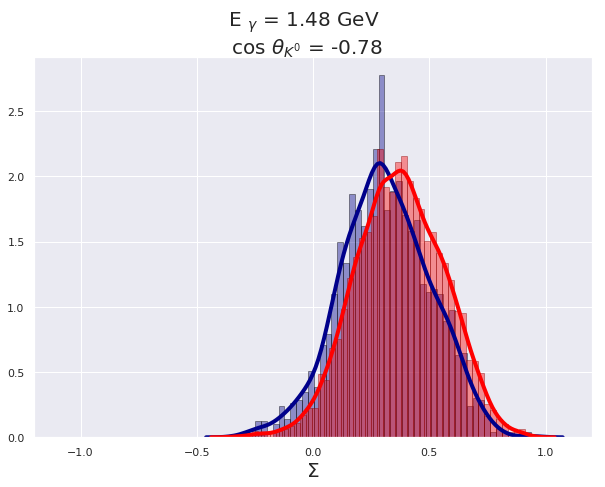

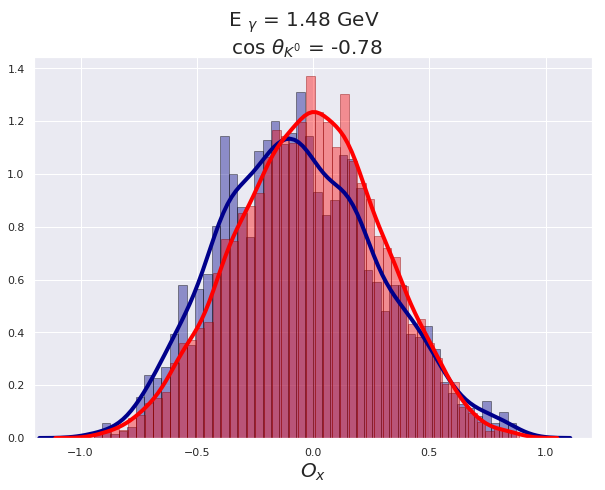

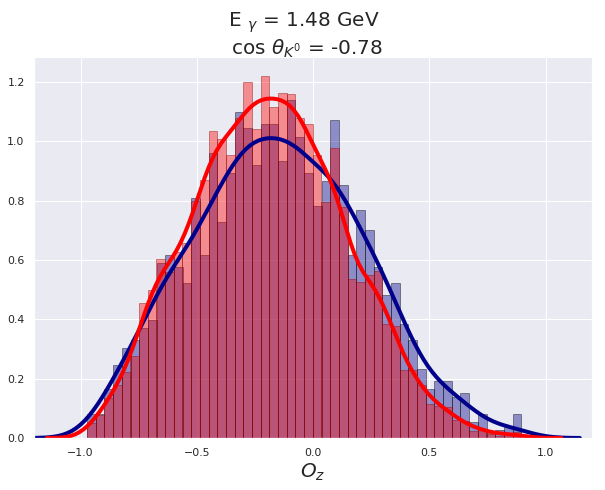

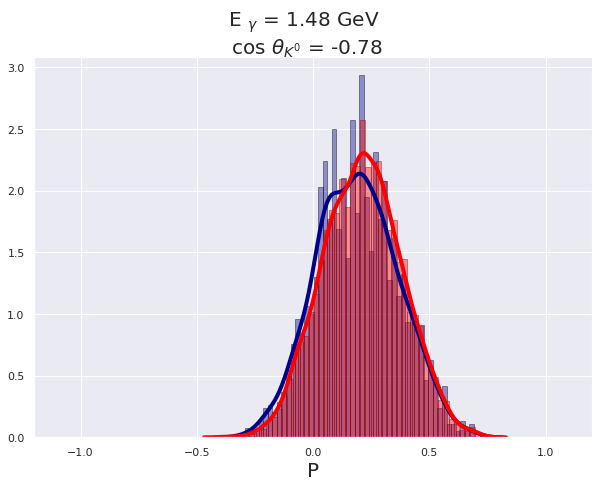

<Figure size 720x504 with 0 Axes>

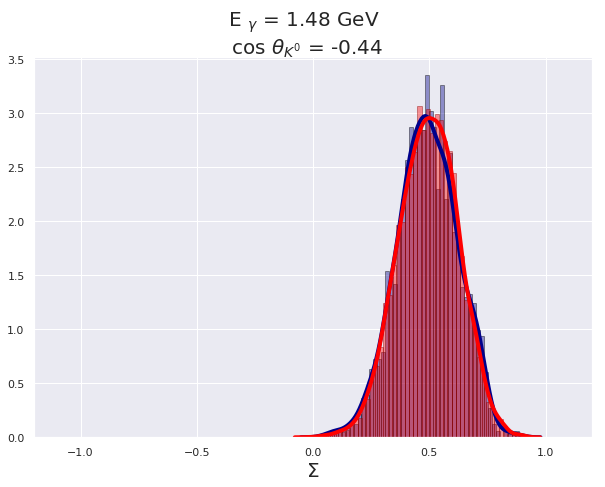

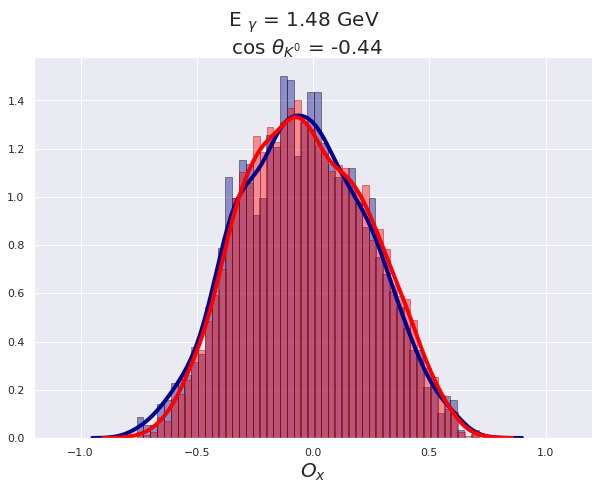

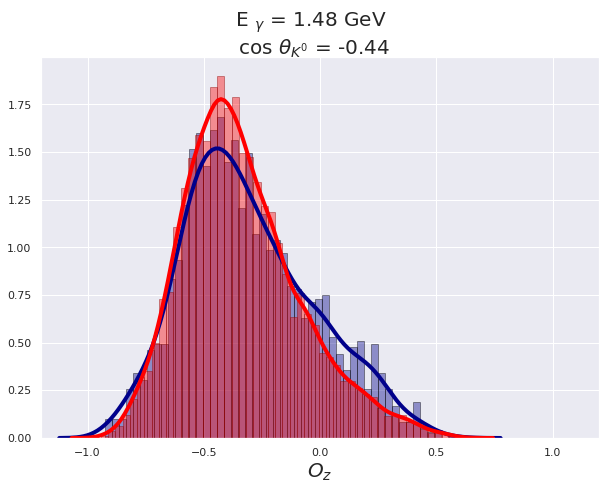

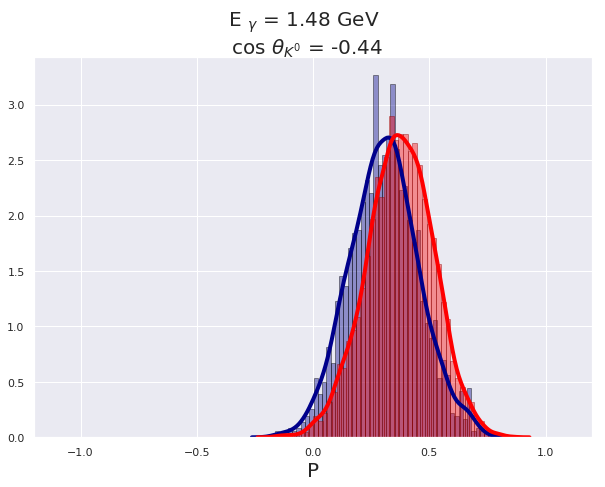

<Figure size 720x504 with 0 Axes>

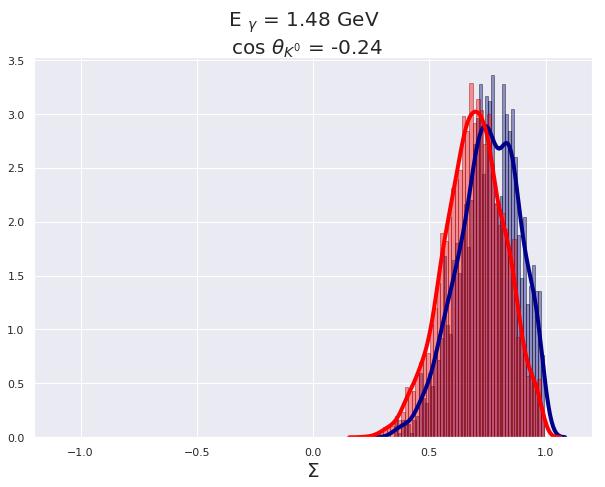

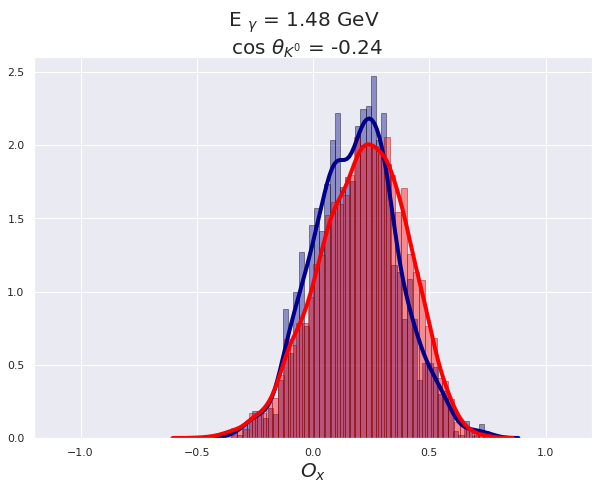

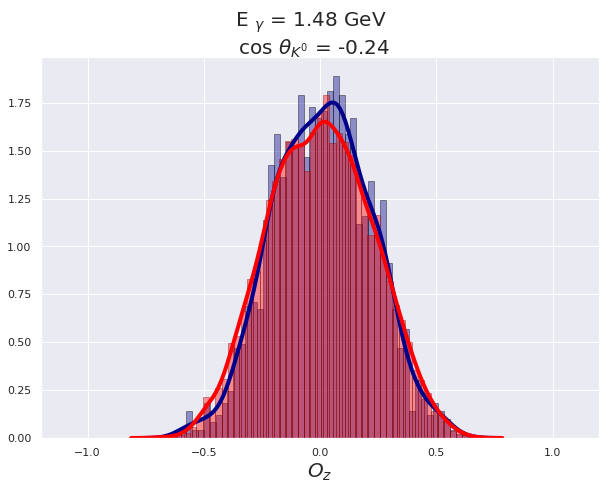

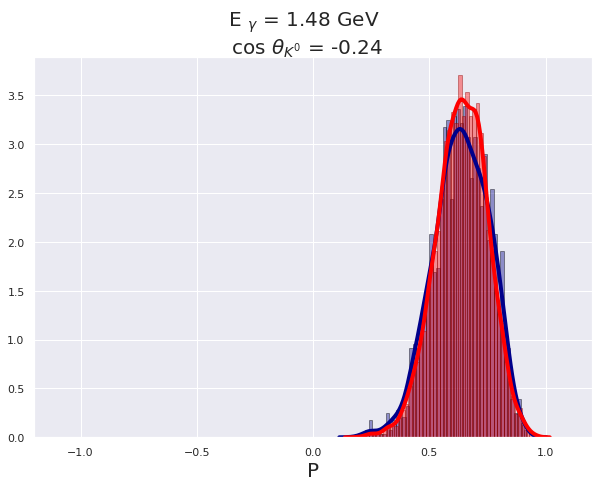

<Figure size 720x504 with 0 Axes>

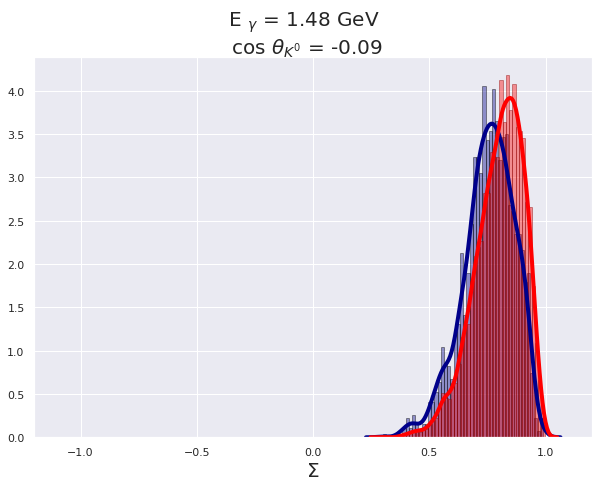

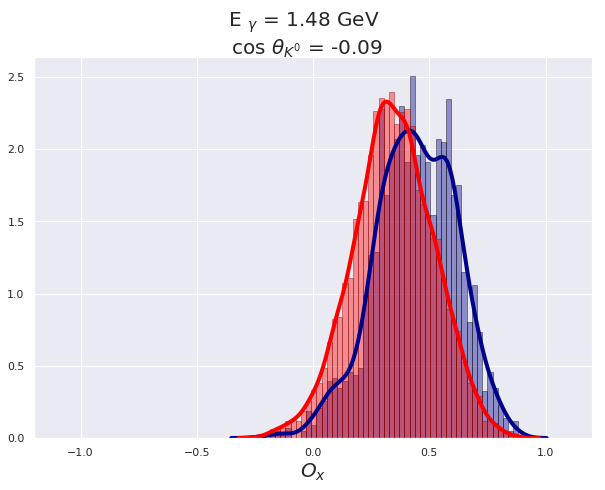

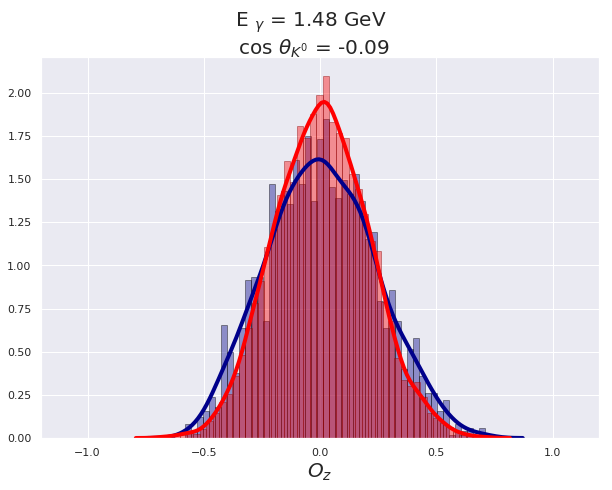

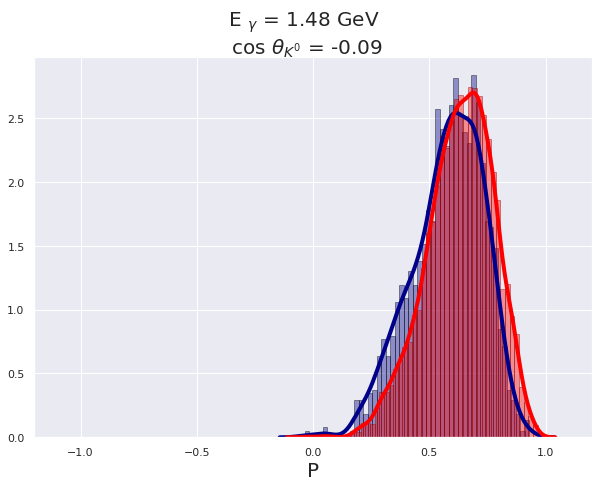

<Figure size 720x504 with 0 Axes>

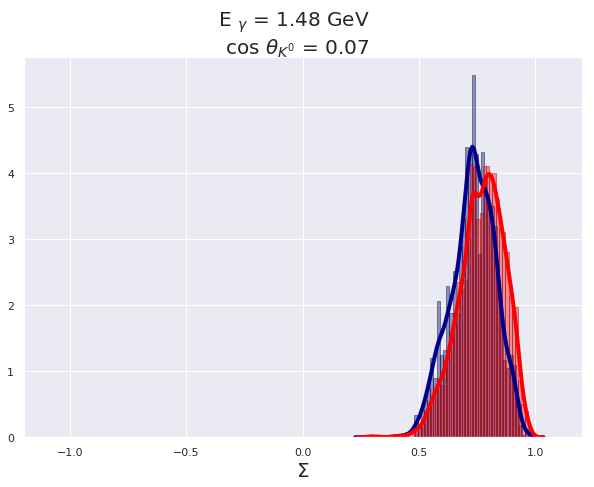

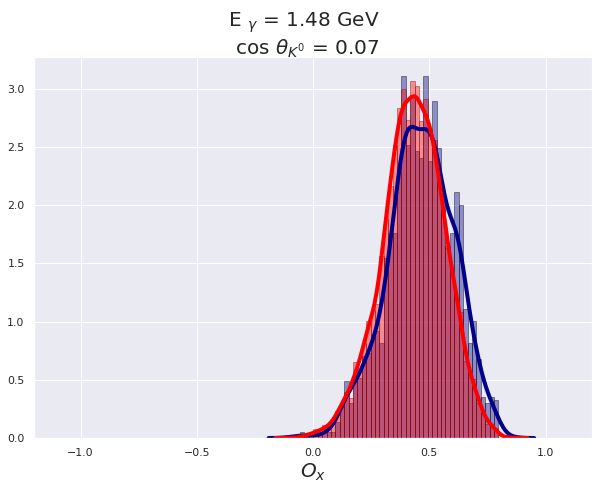

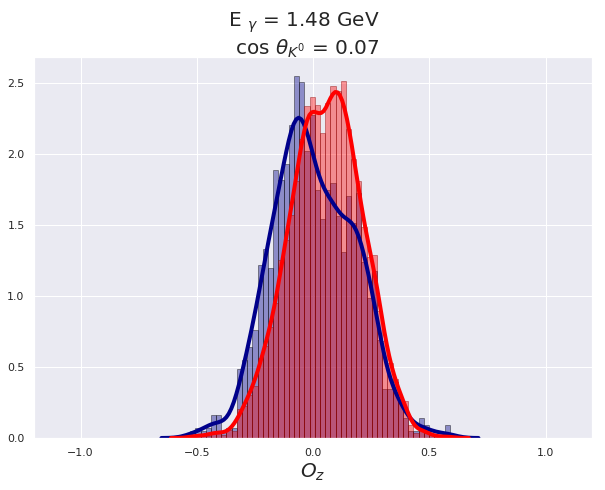

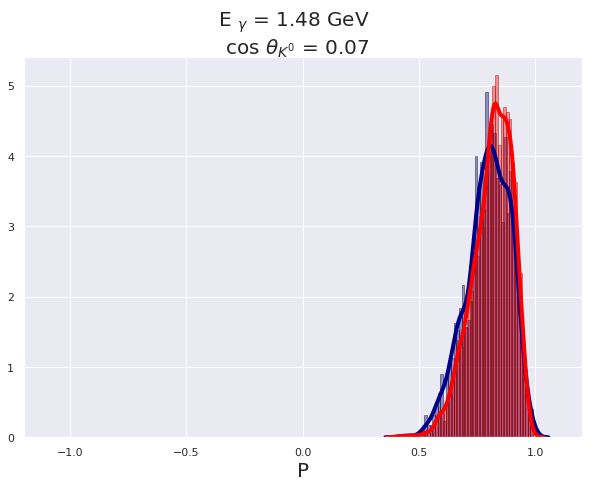

<Figure size 720x504 with 0 Axes>

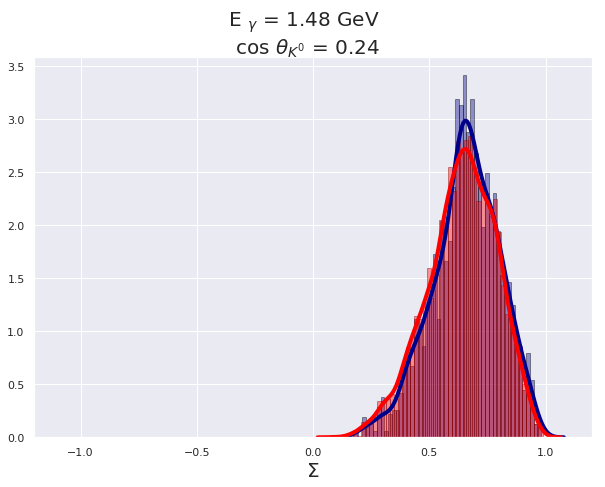

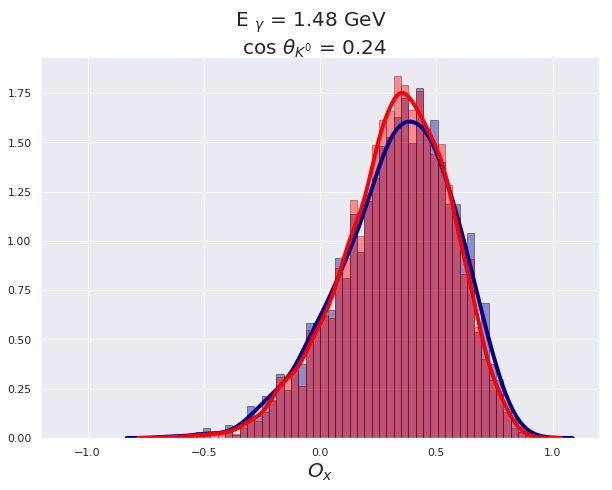

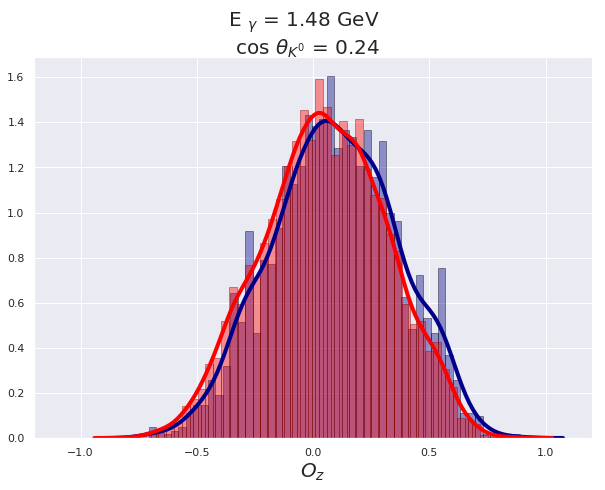

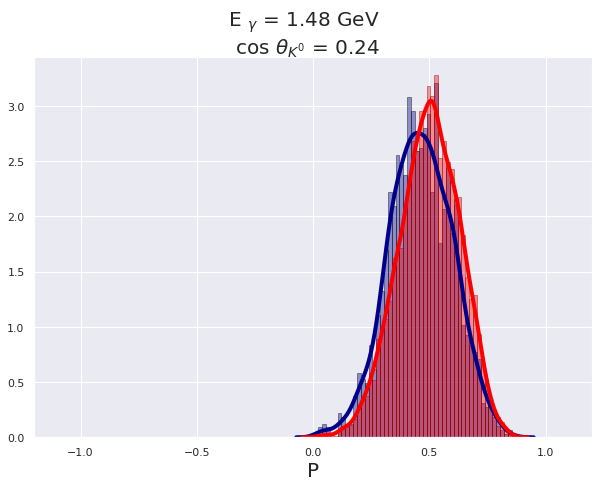

<Figure size 720x504 with 0 Axes>

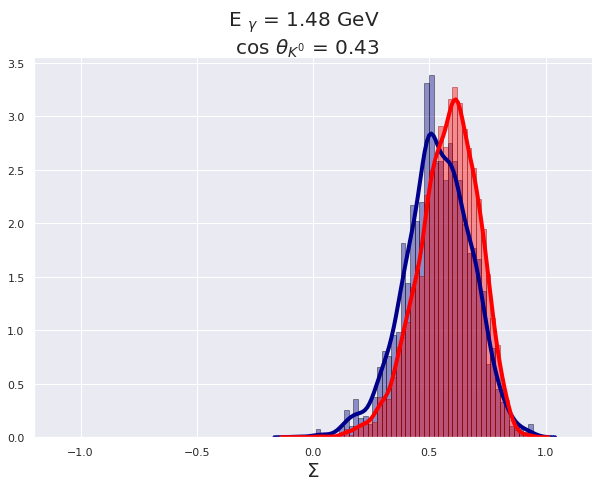

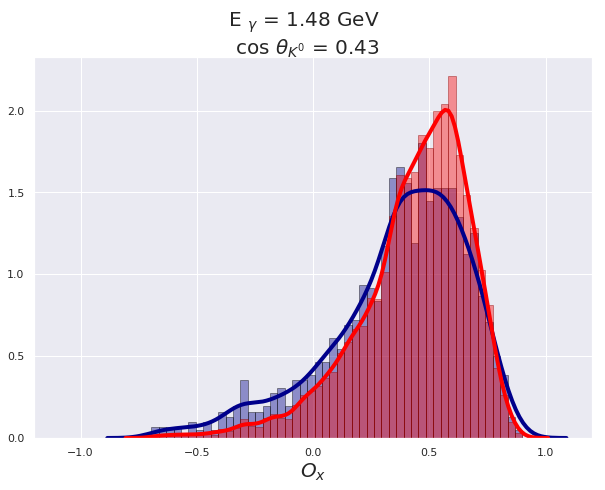

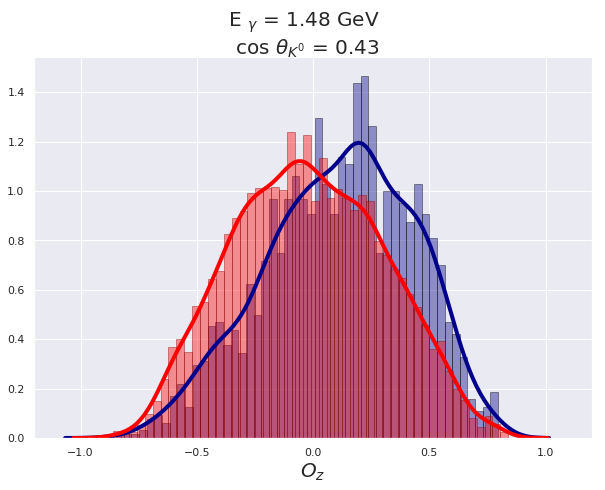

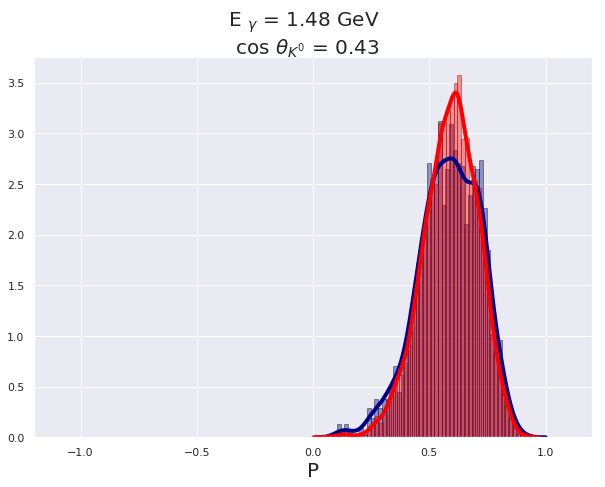

<Figure size 720x504 with 0 Axes>

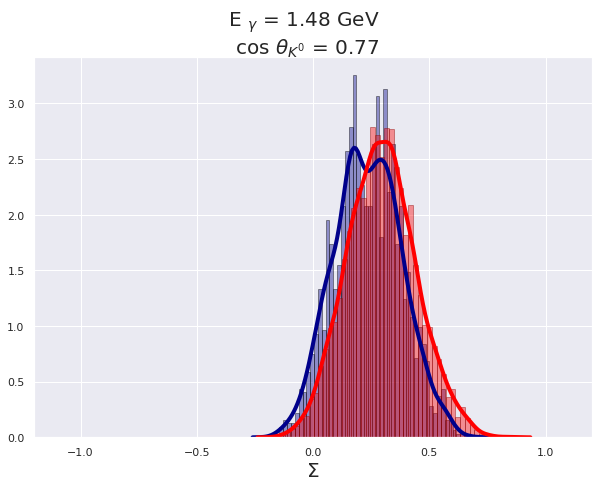

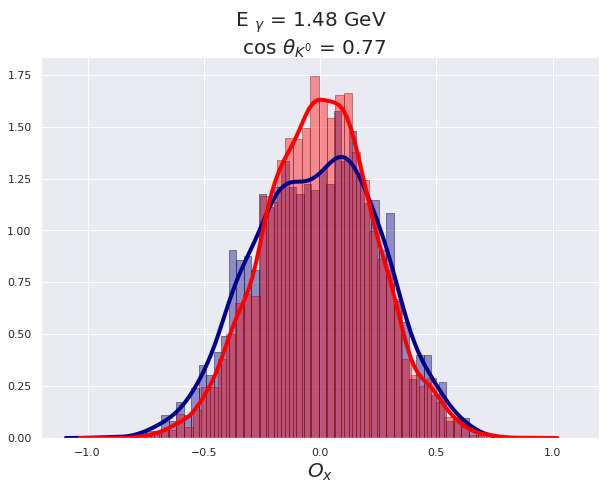

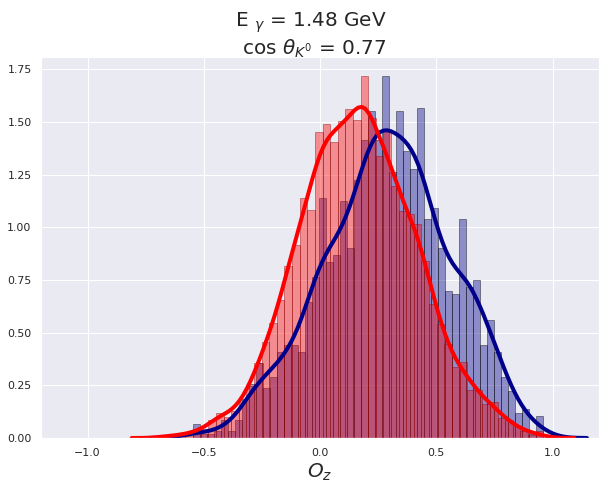

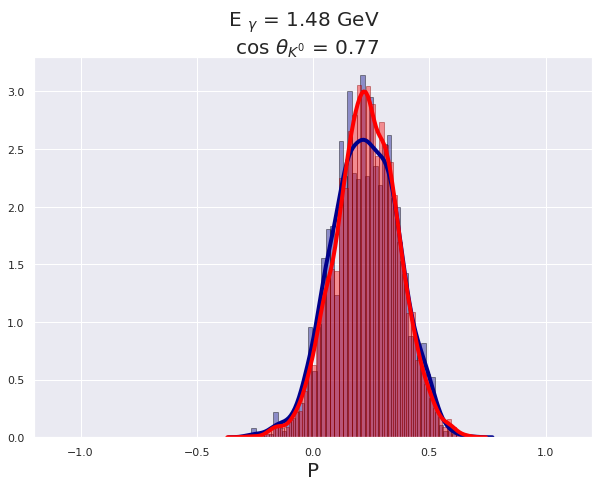

<Figure size 720x504 with 0 Axes>

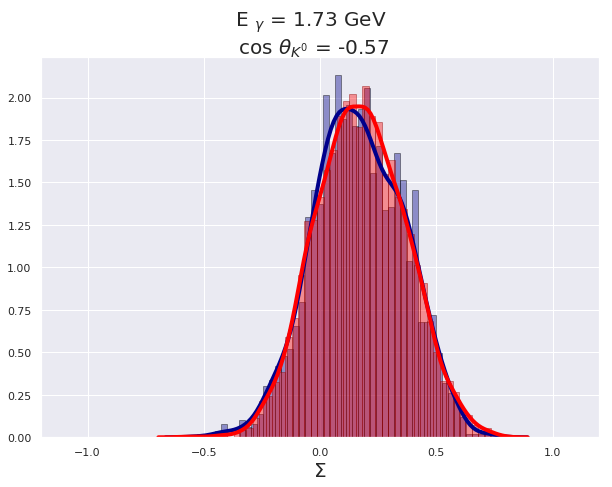

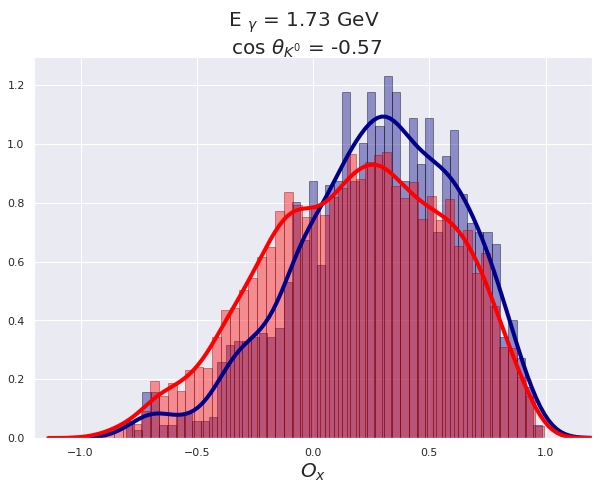

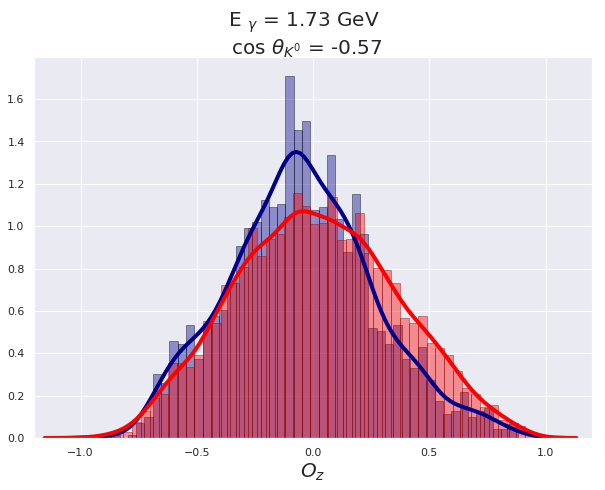

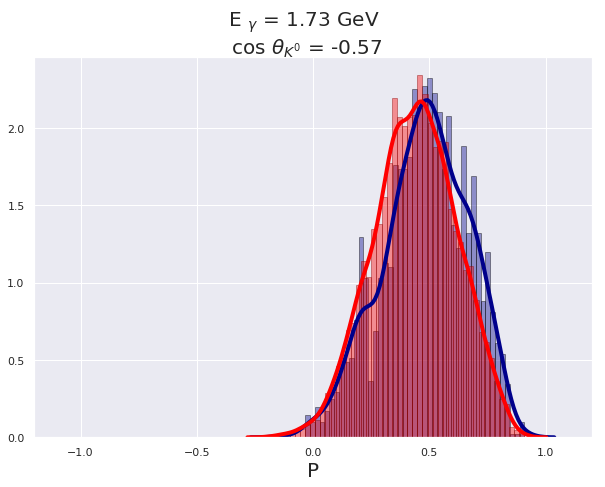

<Figure size 720x504 with 0 Axes>

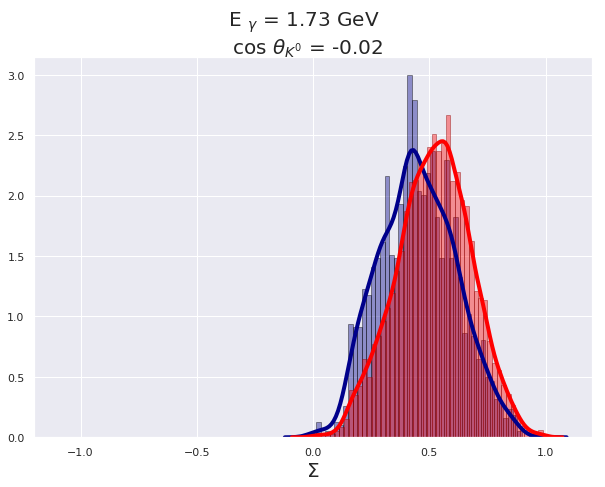

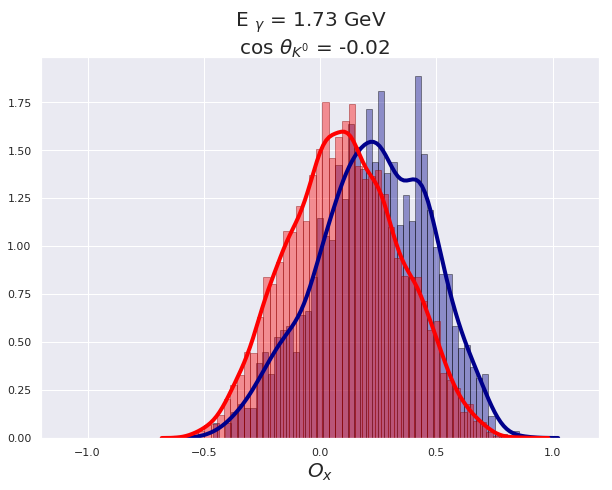

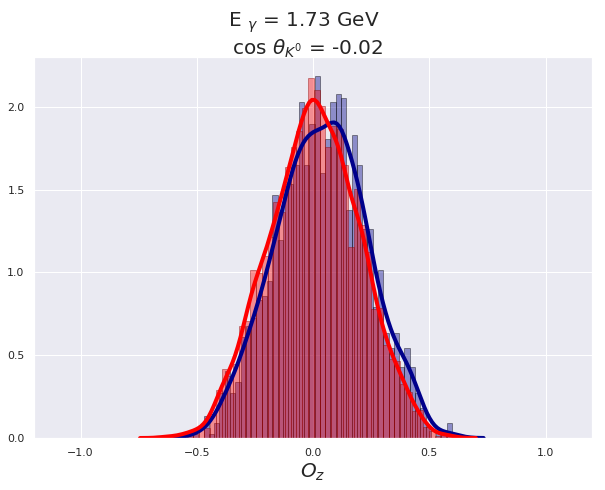

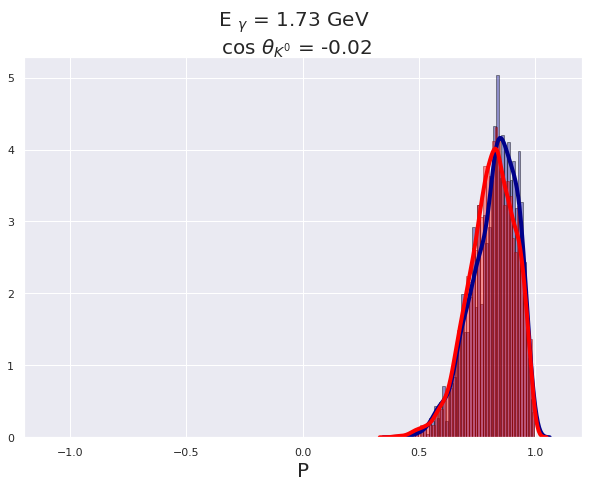

<Figure size 720x504 with 0 Axes>

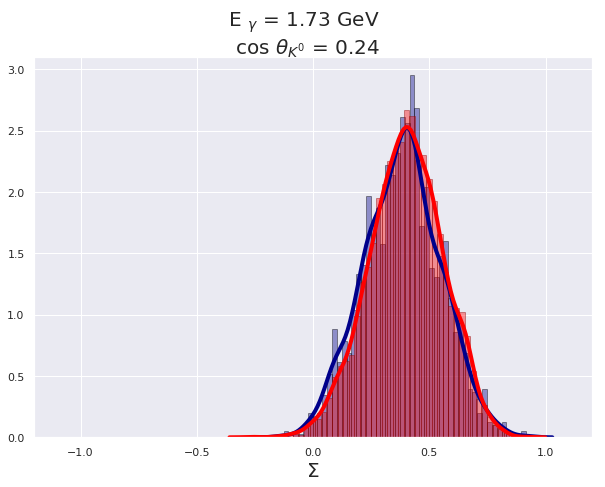

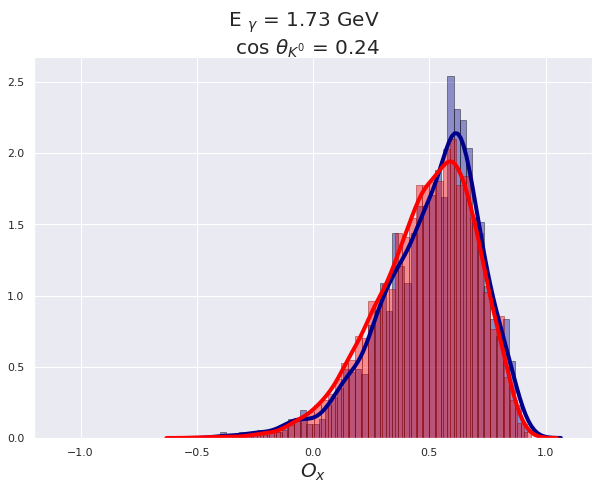

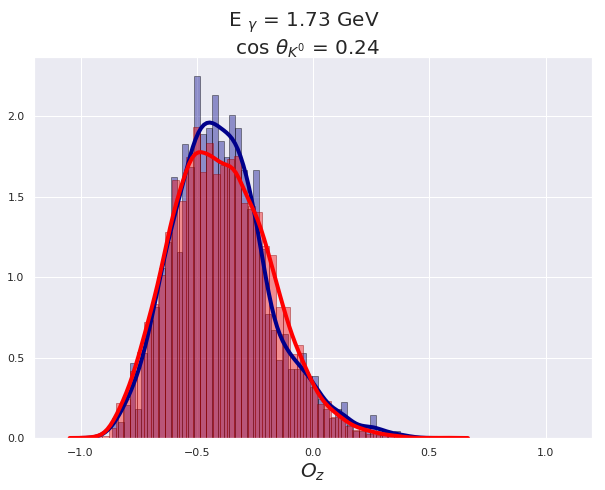

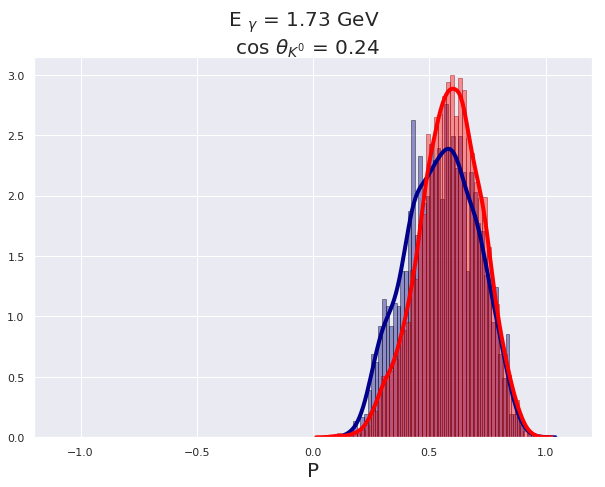

<Figure size 720x504 with 0 Axes>

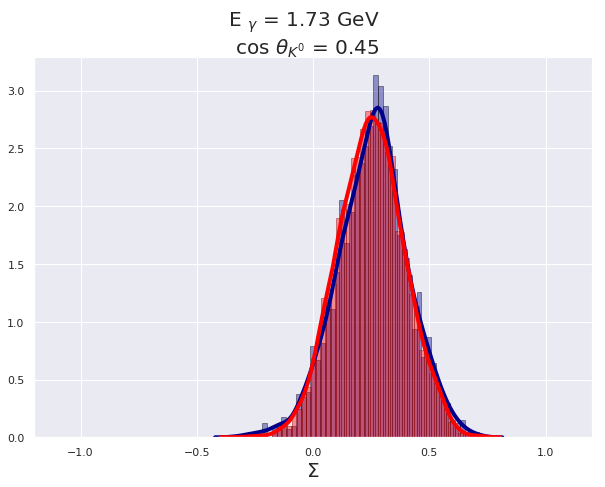

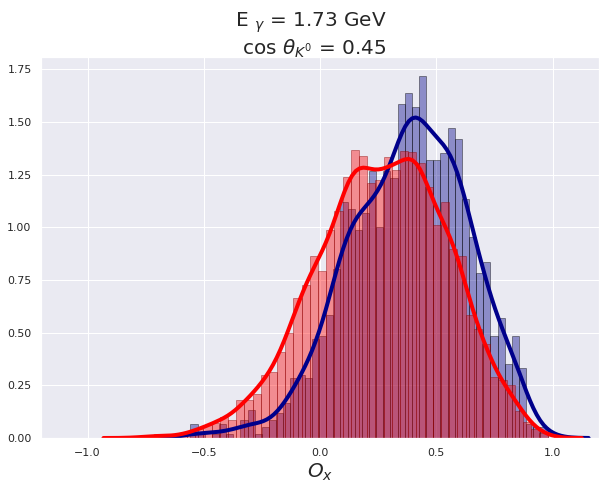

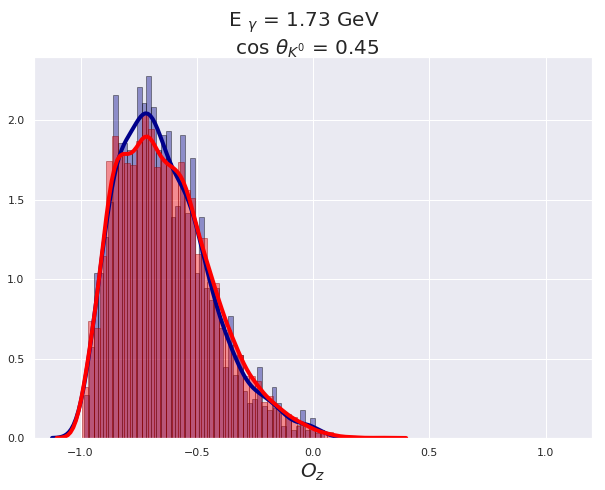

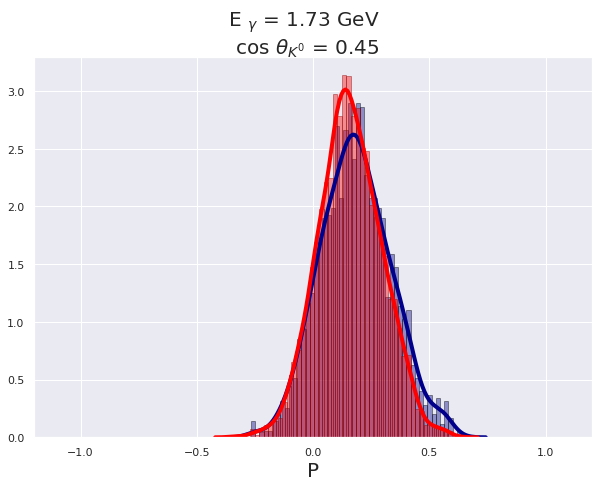

<Figure size 720x504 with 0 Axes>

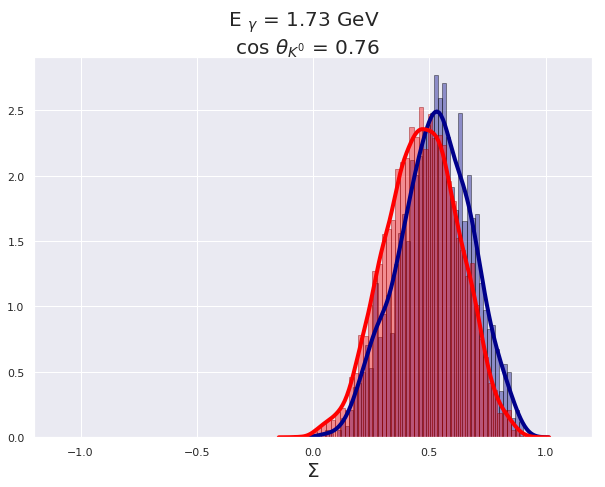

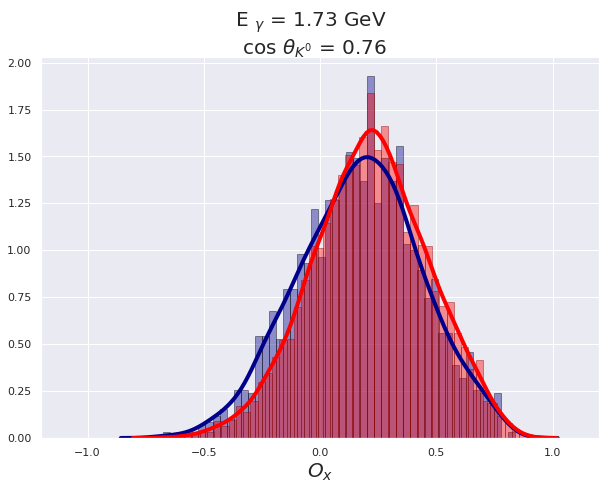

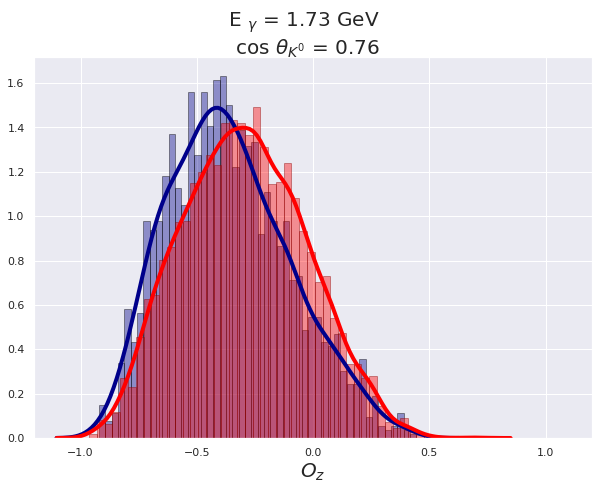

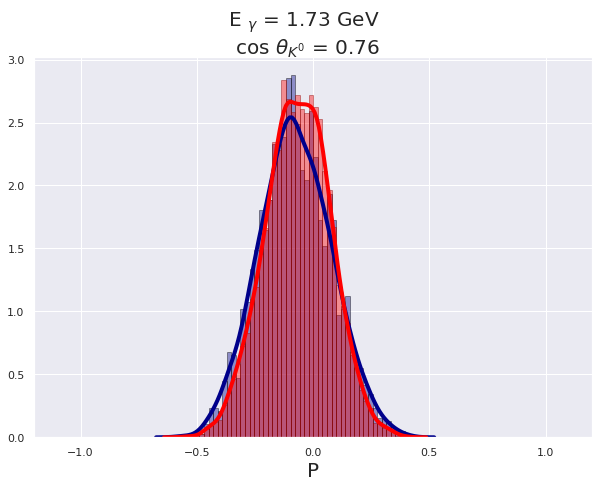

<Figure size 720x504 with 0 Axes>

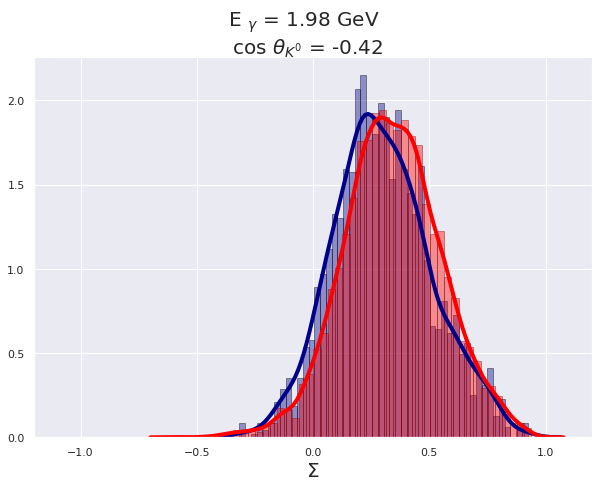

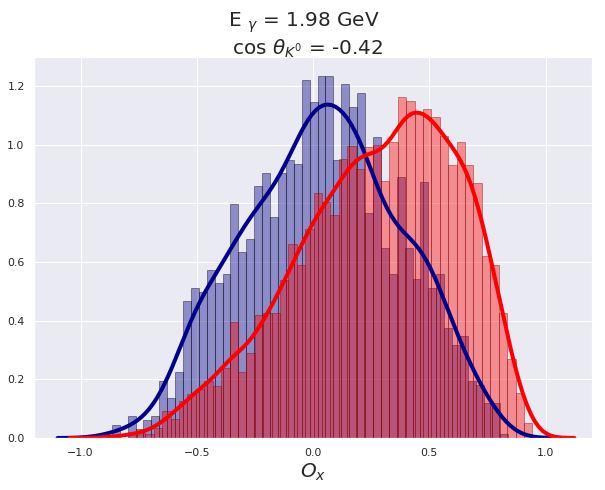

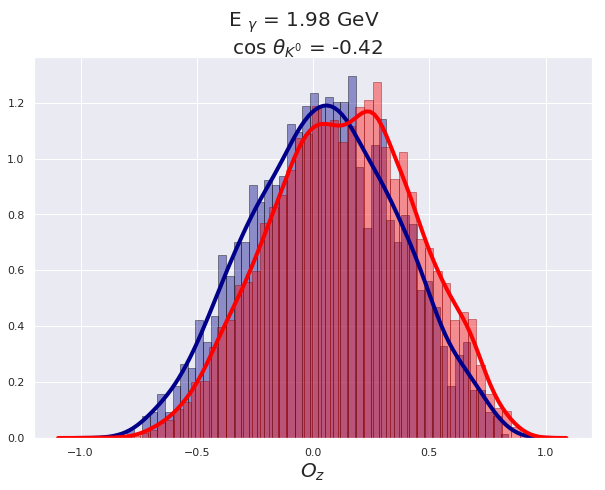

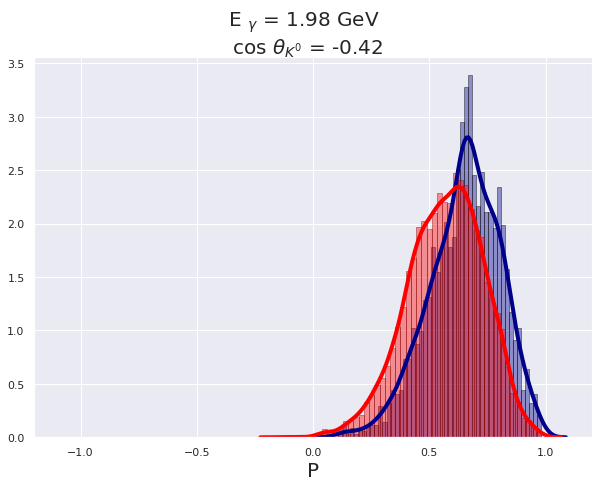

<Figure size 720x504 with 0 Axes>

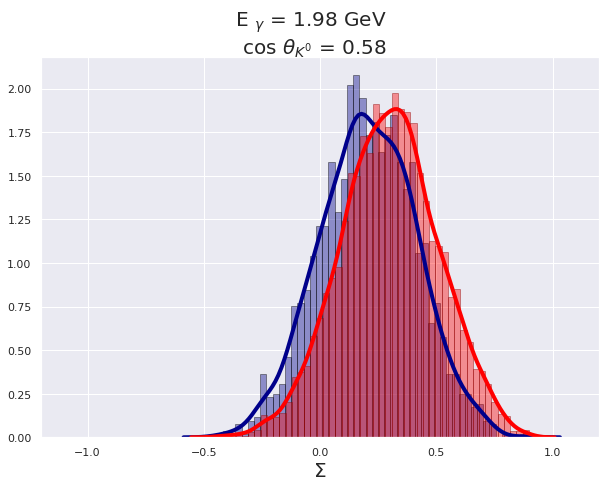

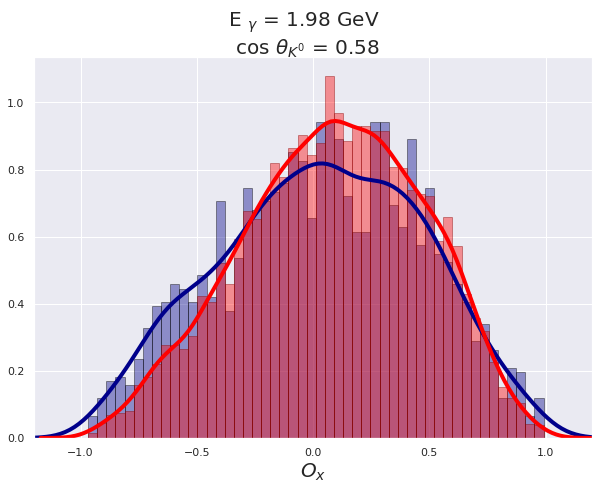

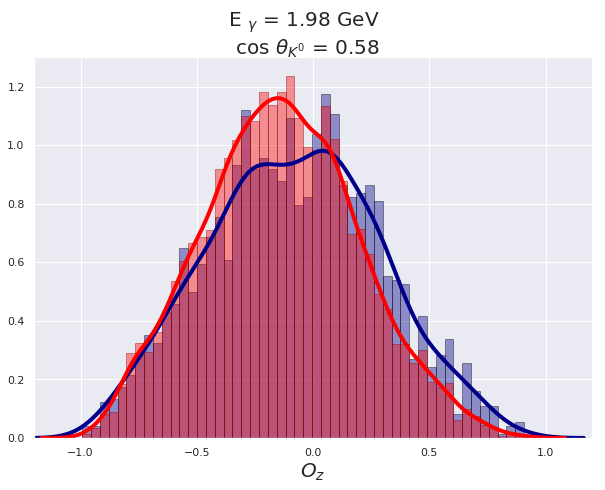

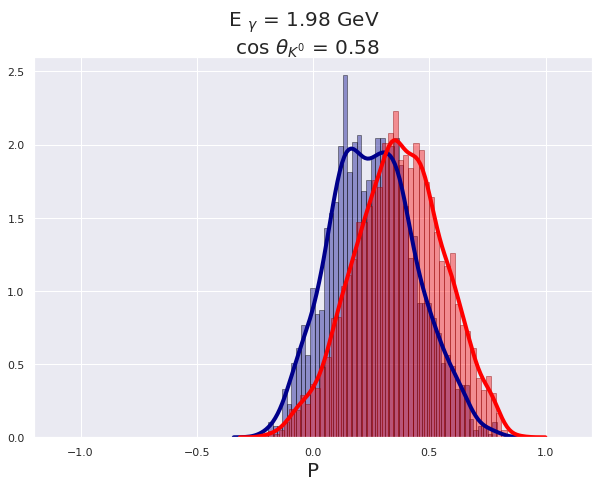

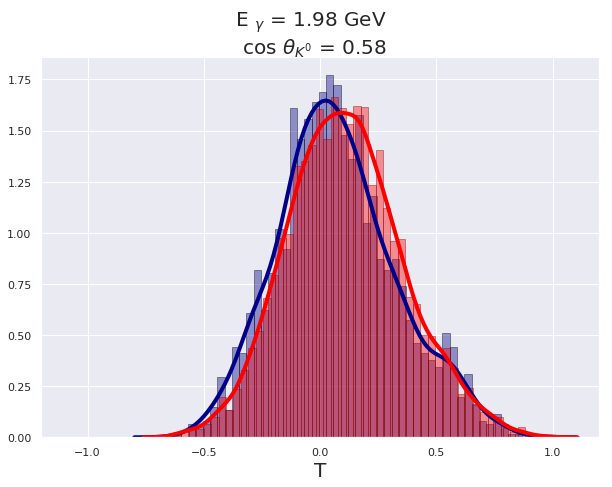

In [14]:
# KDE plots for all bins
imageDir = topDir+'MCMCKde/'

# obs
n_obs = len(obs_labels)
axLabels=['$\Sigma$','$O_x$','$O_z$','P','T']

# add a column to the dataframe for bin start (0.02 bin width)
csv_df['binStart'] = ((csv_df['Val'] * 100) // 2) / 50
mergedcsv_df['binStart'] = ((mergedcsv_df['Val'] * 100) // 2) / 50

print(csv_df.head())

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        plt.clf()
        #fig, axes = plt.subplots(n_obs, figsize=(20, 15))
        
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        mergeddfEg = mergedcsv_df[mergedcsv_df['Egamma']==Eg_bins[ebin_idx]]
        mergeddfCosth = mergeddfEg[mergeddfEg['costh']==costh_bins[ebin_idx][tbin_idx]]
        
        for i in range(n_obs):
            dfB = dfCosth[dfCosth['Obs']==obs_labels[i]]
            dfB = dfB.reset_index()
            mergeddfB = mergeddfCosth[mergeddfCosth['Obs']==obs_labels[i]]
            mergeddfB = mergeddfB.reset_index()

            fig, axes = plt.subplots(1, figsize=(10, 7))

            sns.distplot(dfB['Val'], hist=True, kde=True, 
                             bins=50, color = 'darkblue', 
                             hist_kws={'edgecolor':'black'},
                             kde_kws={'linewidth': 4, 'bw': 'scott'})
            sns.distplot(mergeddfB['Val'], hist=True, kde=True, 
                             bins=50, color = 'red', 
                             hist_kws={'edgecolor':'darkred'},
                             kde_kws={'linewidth': 4, 'bw': 'scott'})
            #axes = dfB['Val'].plot.kde()
            #axes = dfB['Val'].plot.hist()
            axes.set_xlabel(axLabels[i], fontsize=20)
            axes.set_xlim(-1.2,1.2)

            fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)
            #fig.legend(fontsize=14, loc="lower right")
            plt.savefig(imageDir+str(ebin_idx)+str(tbin_idx)+obs_labels[i]+"kde.png")
            #plt.clf()
        


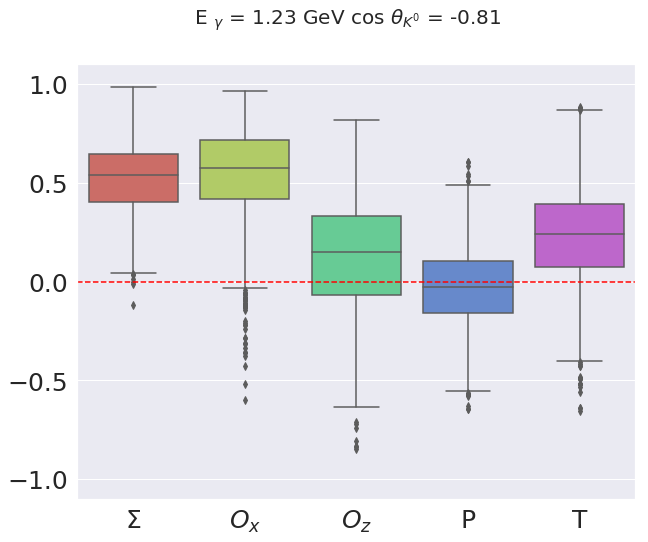

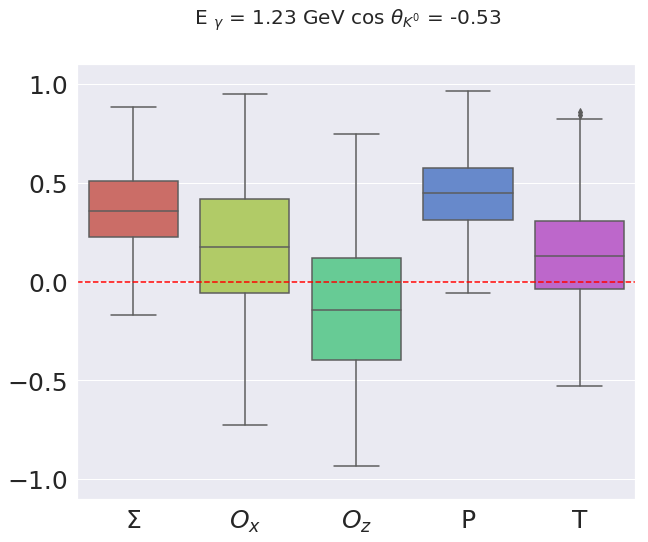

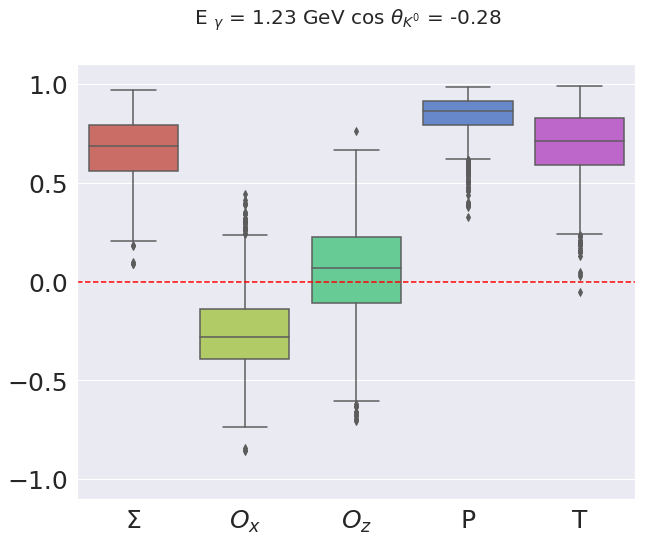

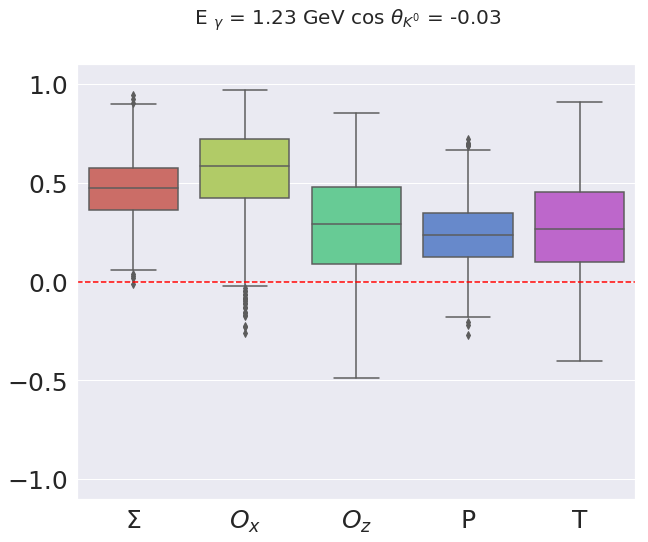

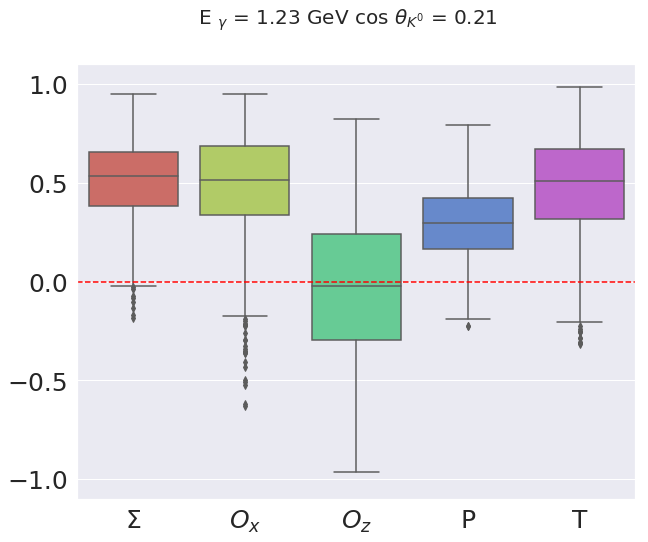

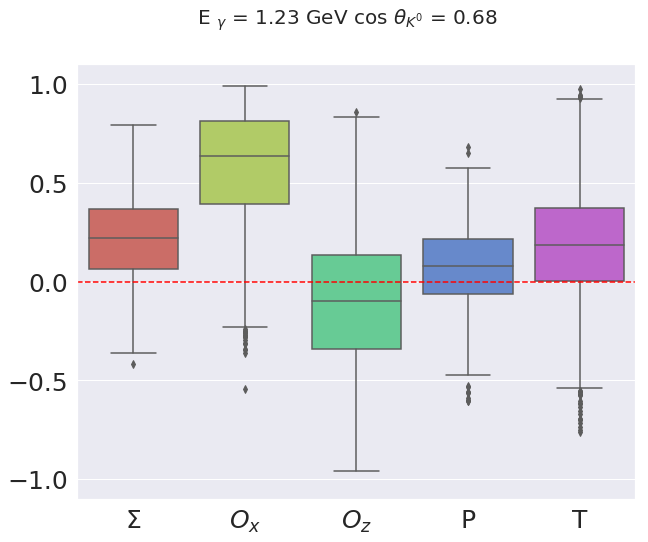

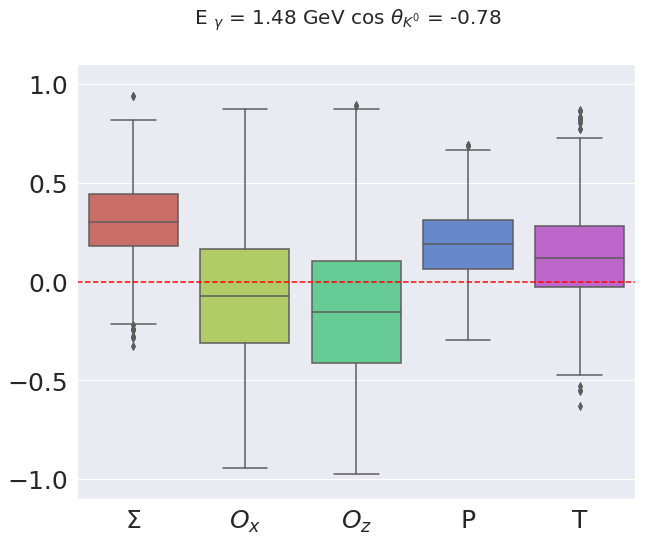

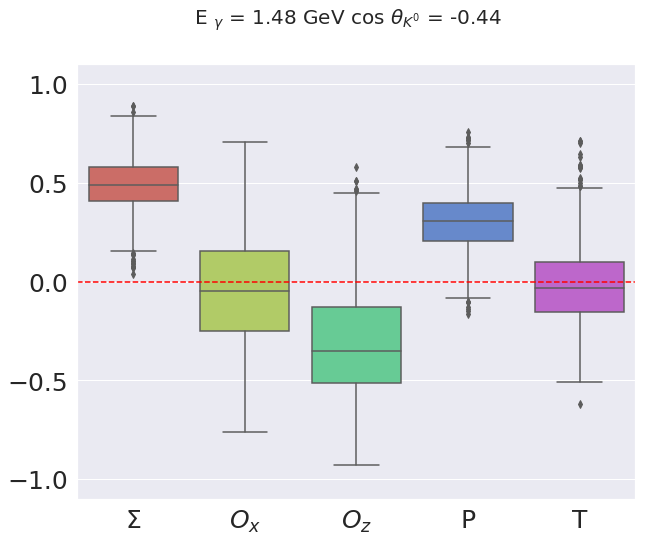

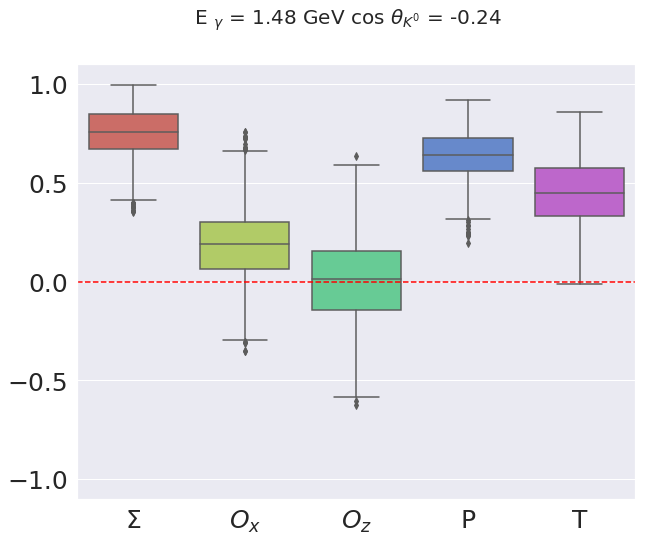

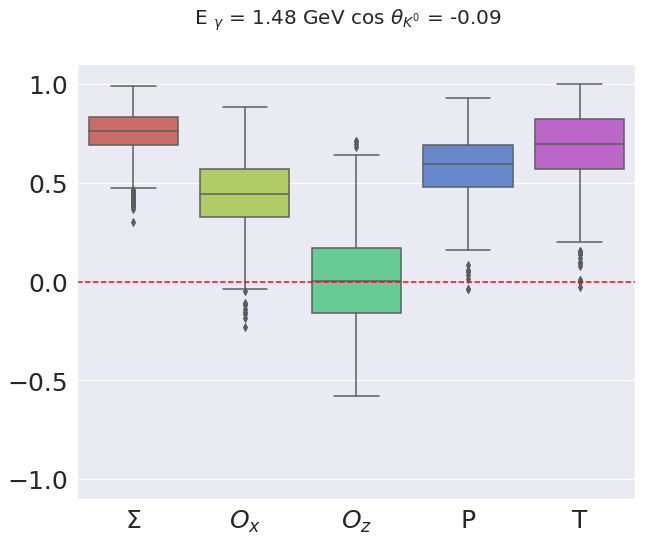

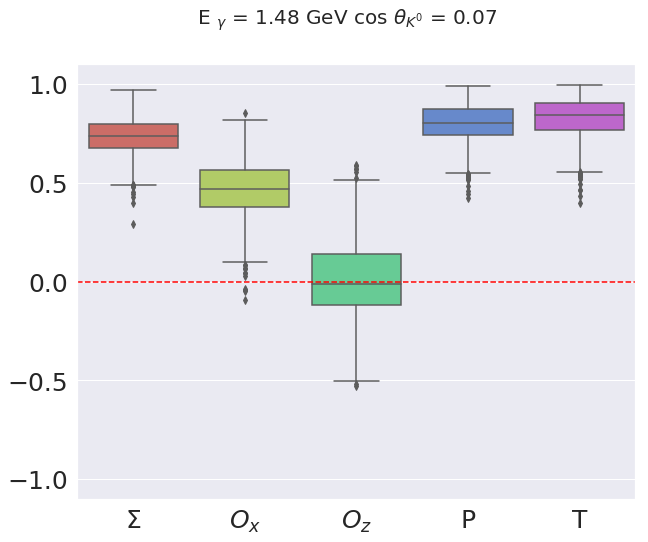

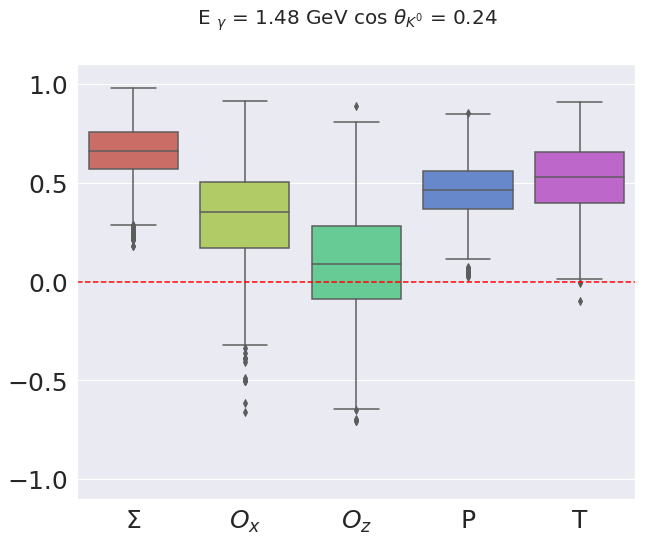

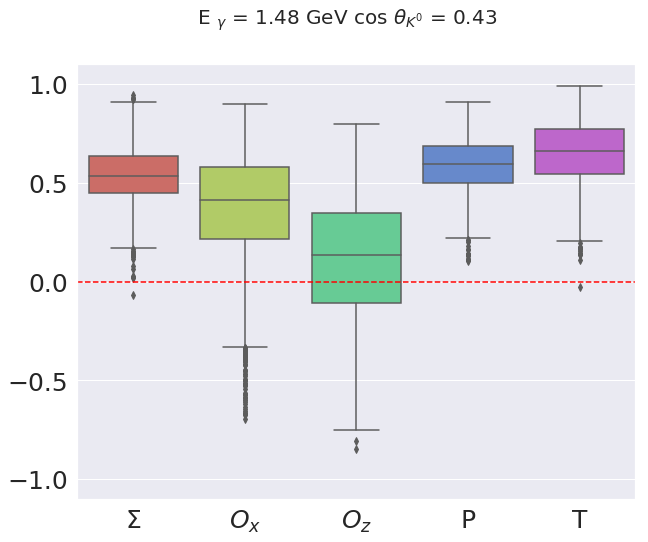

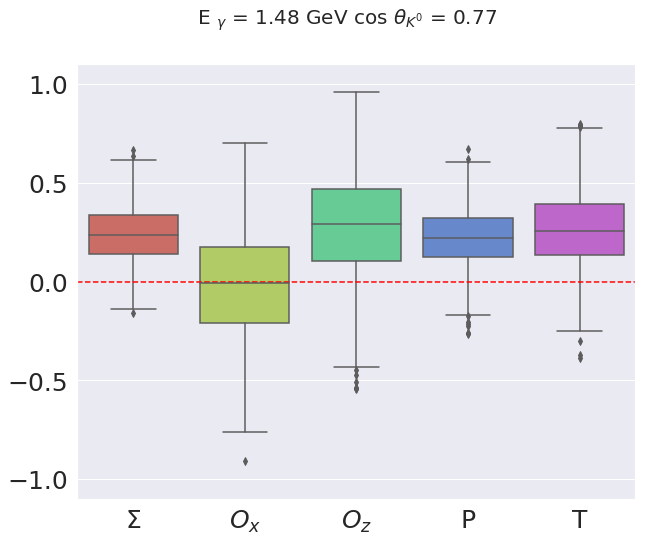

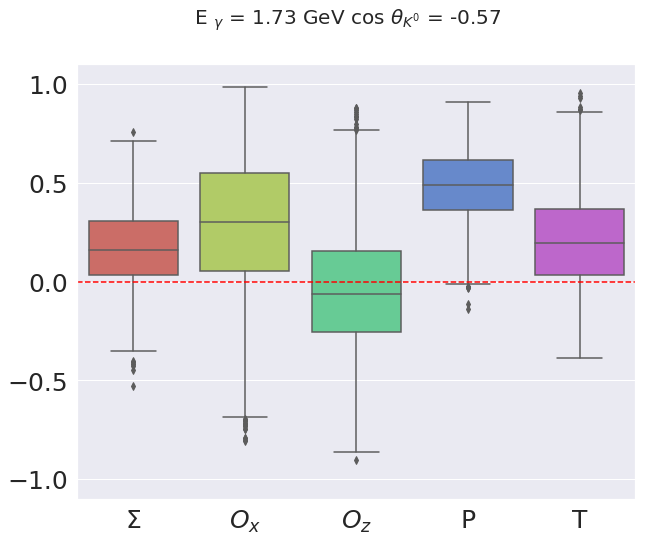

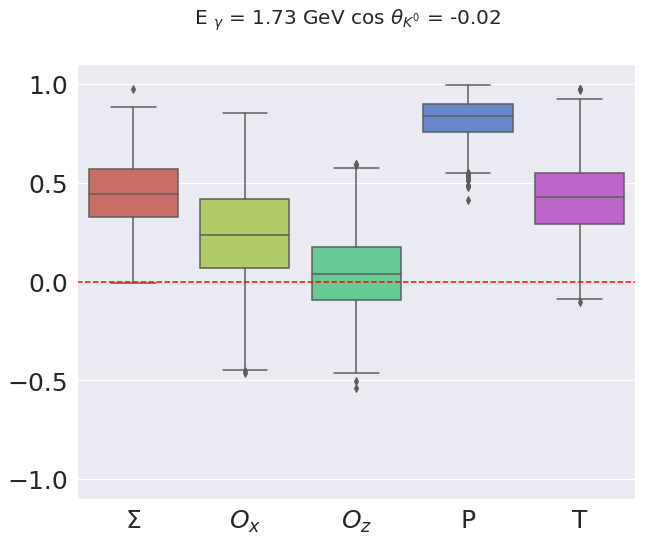

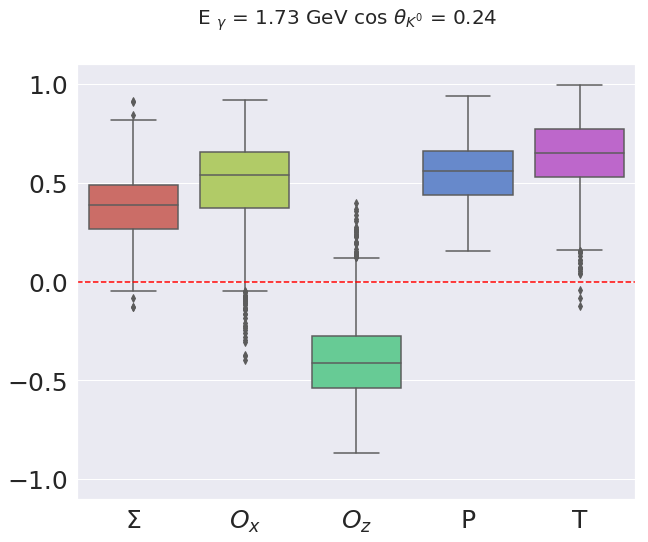

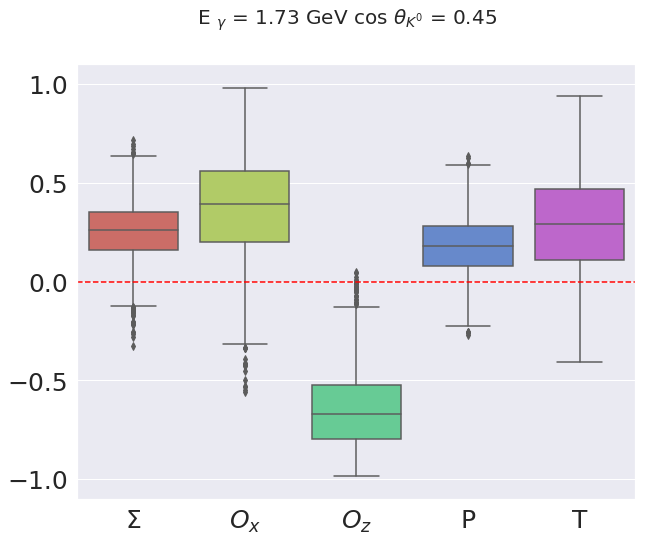

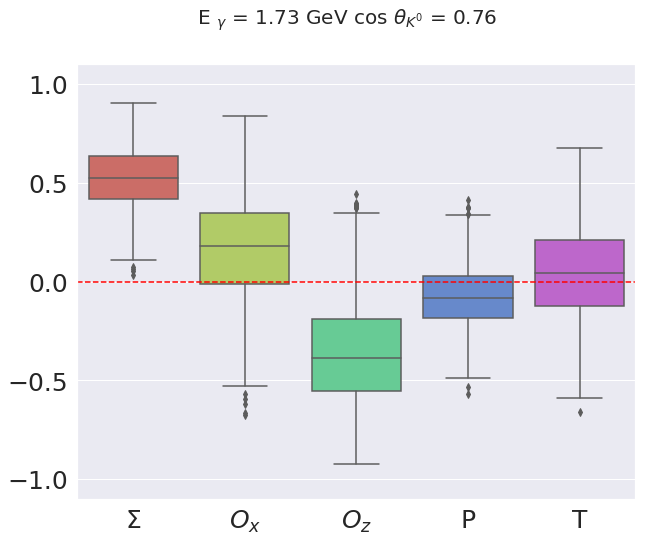

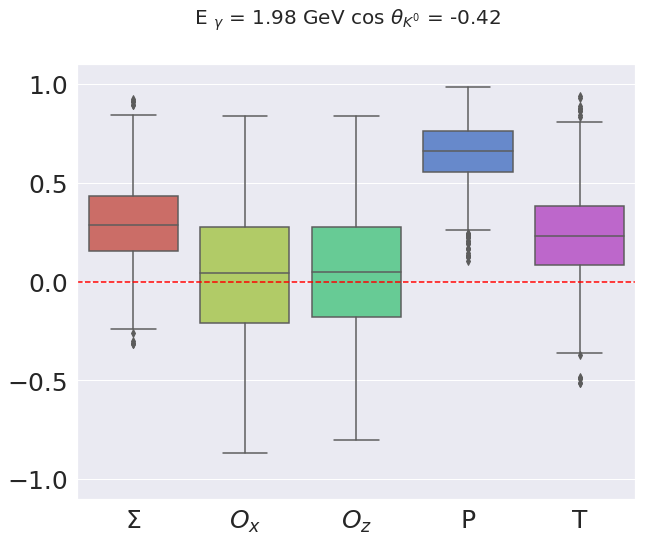

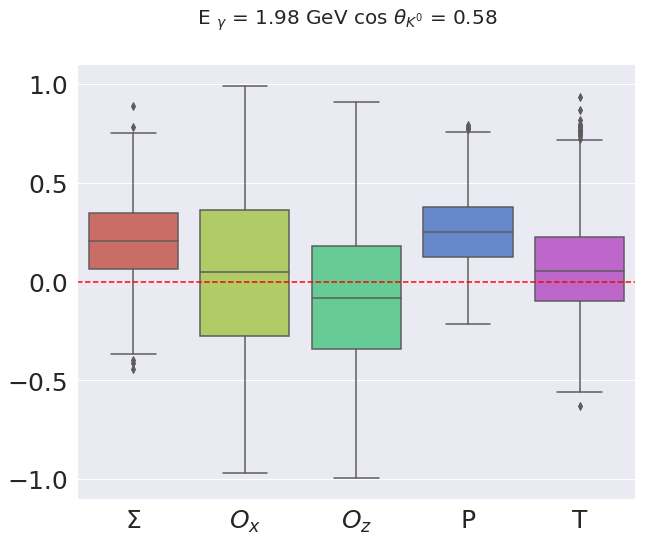

In [15]:
# observable box plots for all bins

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # Use cubehelix to get a custom sequential palette
        pal = sns.color_palette("hls", n_obs)

        # Show each distribution with both violins and points
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        bPlt = sns.boxplot(data=dfObs, palette=pal)

        ax.set_ylim(-1.1,1.1)
        ax.axhline(0.0,color='red',linestyle='--')
        ax.set_xticklabels(['$\Sigma$','$O_x$','$O_z$','P','T'])
        bPlt.tick_params(labelsize=25)
        
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()